<a href="https://colab.research.google.com/github/Vicky-hub87/Team_RM5_JHB_Unsupervised/blob/master/Notebook_rm5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="data_set"></a>
# <span style="color: #DF3B57">TEAM <span style="color: #D8A47F">RM5 <span style="color: #EE4B6A"> UNSUPERVISED <span style="color: #EF8365"> LEARNING <span style="color: #DF3B57" align = "centre"> NOTEBOOK </span>

---
<img src="https://github.com/Vicky-hub87/Team_RM5_JHB_Unsupervised/blob/master/jakob-owens-CiUR8zISX60-unsplash%20(3).jpg?raw=true" align="centre">  


**Team Members:** : Iman Mokwena, Victoria Chepape, Lawrence Tjajie, Kopano Monyobo, Ifeoluwapo Oni

**Supervisor:** Ridha Moosa

### Table of Content
---

1. [Introductory Remarks](#intro)
 * Introduction
 * Problem Statement
 * Market Analysis
 * About the Data
 * Variables
---

2. [Import Libraries](#libraries)
 * Basic Dataset Libraries (numpy and pandas)
 * API Libraries
 * EDA and Data Cleaning Libraries
 * Model Libraries
 * Model Performance Libraries
 * Import Datasets
 * USER GUIDE
---

3. [Merge DataFrames](#mergedf)
 * Create ID column
 * Filter tags on relevance
 * Merge DataFrames
---

4. [API Data Capturing](#datacapture)
 * Find subset of data with null values
 * Fix mispelt movie names
 * Run API
 * Export CSV API
 * Clean API Dataset
 * Merge API Data With Train Data
 * Remarks
---

5. [Data Cleanup](#cleanup)
 * Clean Timestamp
 * Clean all other feature columns
---

6. [Exploratory Data Analysis](#eda)
 * Ratings EDA
 * Budget EDA
 * Genres EDA
 * Viewership EDA
---

7. [Base Model](#basemodel)
 * Build Base Model
 * Markdown Remarks
---

8. [Collaborative Filtering Model](#collabmodel)

---

9. [Content Based Model](#contentmodel)

---

10. [Model Analysis](#modelanalysis)

---

11. [Conclusion](#conclusion)

## 1. Introductory Remarks <a class="anchor" id="#intro"></a>


### Introduction

<img src="https://github.com/Vicky-hub87/Team_RM5_JHB_Unsupervised/blob/master/inbox_2205222_bca114f2e4f6b9b46f2cc76527d7401e_Image_header.png?raw=true" align="centre">  


Recommendation systems are becoming increasingly important in today’s extremely busy world. People are always short on time with the myriad tasks they need to accomplish in the limited 24 hours. In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. Recommendation systems are important as they help them make the right choices

_

In this predict we will be building a recommendation algorithm based on content or collaborative filtering,capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

_

Movie Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual.These results are based on their profile, search/browsing history, what other people with similar traits/demographics are watching, and how likely are you to watch those movies. This is achieved through predictive modeling and exploratory of the data. Another objective of the recommendation system is to achieve customer loyalty by providing relevant content and maximising the time spent by a user on your website. This also helps in increasing customer engagement. 

_

**About the Data**

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

_

* genome_scores.csv - a score mapping the strength between movies and tag-related properties. 

* genome_tags.csv - user assigned tags for genome-related scores

* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.

* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.

* sample_submission.csv - Sample of the submission format for the hackathon.

* tags.csv - User assigned for the movies within the dataset.

* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.

* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


<img src="https://github.com/Vicky-hub87/Team_RM5_JHB_Unsupervised/blob/master/Data-Science-R-Project-Movie-Recommendation.jpg?raw=true" align="centre">  

## 2. Import Libraries <a class="anchor" id="#libraries"></a>

In [1]:
## 0. Import Comet
!pip install comet_ml
from comet_ml import Experiment

# 1. Basic Dataset Libraries

import numpy as np # linear algebra
import pandas as pd
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

## 2. API Libraries
!pip install requests pprint
import requests
import json
from pprint import PrettyPrinter
!pip install tmdbv3api
from tmdbv3api import TMDb
from tmdbv3api import Movie
!pip install IMDBPY
## we will install another API that is able to extract keywords by way of instatiating a class
from imdb import IMDb


## 3. EDA and Data Cleaning Libraries
import string
from tqdm import tqdm
from datetime import datetime
from datetime import time
!pip install wordcloud
import seaborn as sns
import matplotlib.pyplot as plt
# NLP Libraries
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import StandardScaler
sns.set_style()

## 4. Model Libraries
!pip install surprise
import surprise
from surprise import SVD, accuracy
from surprise import Dataset, Reader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
## 5. Model Performance Libraries
from surprise.model_selection import train_test_split, GridSearchCV, KFold
from surprise import accuracy



## User Guide

***1. We recommend running the full notebook as is on a powerful processor like a AWS EC2 2xLarge instance.***

***2. If using a normal computer, we recommend turning the Subset Data cell from a markdown into a code cell.***

***3. If running on kaggle we recommend you turing the import for kaggle submission from markdown to code cell and turing the import dataset cell from code to markdown.***

Please do note that not running this on high process computer or instance will affect some of the results for the EDA section and may give a lower score on the modelling section.


# Import For Kaggle Submission (Delete comment)

train = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/train.csv', dtype = {'userId': 'int32', 'movieId': 'int32', 'rating': 'float32', 'timestamp': 'int32'})
test = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/test.csv', dtype = {'userId': 'int32', 'movieId': 'int32', 'rating': 'float32', 'timestamp': 'int32'})
scores = pd.read_csv("/kaggle/input/edsa-recommender-system-predict/genome_scores.csv", dtype = {'tagId': 'int32', 'movieId': 'int32', 'relevance': 'float32'})
user_tags = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/genome_tags.csv', dtype = {'tagId': 'int32'})
movie_metadata = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/imdb_data.csv', dtype = {'movieId': 'int32'})
links = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/links.csv', dtype= {'movieId': 'int32'})
movies = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/movies.csv', dtype = {'movieId': 'int32'})
tags = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/tags.csv', dtype= {'tagId': 'int32', 'movieId': 'int32', 'timestamp': 'int32'})
sample = pd.read_csv('/kaggle/input/edsa-recommender-system-predict/sample_submission.csv')

### Import Datasets

In [2]:
train = pd.read_csv('unsupervised_data/unsupervised_movie_data/train.csv', dtype = {'userId': 'int32', 'movieId': 'int32', 'rating': 'float32', 'timestamp': 'int32'})
test = pd.read_csv('unsupervised_data/unsupervised_movie_data/test.csv', dtype = {'userId': 'int32', 'movieId': 'int32', 'rating': 'float32', 'timestamp': 'int32'})
scores = pd.read_csv("unsupervised_data/unsupervised_movie_data/genome-scores.csv", dtype = {'tagId': 'int32', 'movieId': 'int32', 'relevance': 'float32'})
user_tags = pd.read_csv('unsupervised_data/unsupervised_movie_data/genome-tags.csv', dtype = {'tagId': 'int32'})
movie_metadata = pd.read_csv('unsupervised_data/unsupervised_movie_data/imdb_data.csv', dtype = {'movieId': 'int32'})
links = pd.read_csv('unsupervised_data/unsupervised_movie_data/links.csv', dtype= {'movieId': 'int32'})
movies = pd.read_csv('unsupervised_data/unsupervised_movie_data/movies.csv', dtype = {'movieId': 'int32'})
#tags = pd.read_csv('unsupervised_data/unsupervised_movie_data/tags.csv', dtype= {'tagId': 'int32', 'movieId': 'int32', 'timestamp': 'int32'})
sample = pd.read_csv('unsupervised_data/unsupervised_movie_data/sample_submission.csv')

## Subset data

Comment out if running on Kaggle

In [3]:
##train = train.iloc[:100000]

## 3.  Merge Dataframes <a class="anchor" id="#mergedf"></a>


### Create ID Column

In [4]:
# create same naming convention as the test set
#train['Id'] = train.userId.astype(str) + '_' + train.movieId.astype(str)

### Filter Tags on Relevance

In [5]:
# some movie tags have very little relevance thus we will filter out those ones that have a small measure train
relevant_scores = scores[scores['relevance'] > 0.5]

# merge tag with scores to get tag names
scores_rel_with_tags = pd.merge(relevant_scores, user_tags, on = 'tagId') 

# visualize a subset of the tags column per movie
scores_rel_with_tags[scores_rel_with_tags['movieId'] == 1] 

# we wil create a dictionry where the keys are the movie ids and values are all the relevant tags in one list
tags_dict = scores_rel_with_tags.groupby('movieId')['tag'].apply(list).to_dict()

# we will now map the dictionary to its relevant movie with a new column of tags as a set of tags as a list
train['tags'] = train['movieId'].map(tags_dict)

#visualizing our new training set
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
 4   tags       object 
dtypes: float32(1), int32(3), object(1)
memory usage: 228.9+ MB


### Merge Dataframe

In [6]:
# we will merge our training set with the movie_metadata and movies set to get more features

train_movies = pd.merge(train, movie_metadata, on = 'movieId', how= 'left')

train_movies_meta = pd.merge(train_movies, movies, on = 'movieId', how = 'left')

train_movies_meta.head()

,userId,movieId,rating,timestamp,tags,title_cast,director,runtime,budget,plot_keywords,title,genres
0,5163,57669,4.0,1518349992,"[chase, clever, comedy, dialogue, excellent, e...",Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,"[catastrophe, chase, comedy, cute, cute!, dest...",Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,"[action, adventure, catastrophe, chase, comedy...",Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,"[catastrophe, comedy, funny, happy ending, ori...",Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist|cleave gag|good woman|fbi,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,"[chase, great ending, original, storytelling, ...",Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger|elm street|famous director as h...,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


In [7]:
train_movies_meta.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
tags              130490
title_cast       2971414
director         2969695
runtime          3020065
budget           3519283
plot_keywords    2977050
title                  0
genres                 0
dtype: int64

We can notice that with inner join, we've lost about 70k rows in our dataset. We assume that these movieId did not have this title cast information. We will also try a left join in order to keep all rows and assess from there

## 4. API Data Capturing <a class="anchor" id="#datacapture"></a>

From merging, we can see that some of the movie titles do not contain specific information we may need like title cast. We will try using the TMDB API to extract this information from their database

In [8]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Find subset of data with null values


In [9]:
# we will start by identifying all movie titles that do not have a title cast and try get them with our api
train_api = train_movies_meta[train_movies_meta['title_cast'].isnull()]

missing_info_list = list(train_api['title'].unique())
train_api = pd.DataFrame(missing_info_list, columns = ['title'])
train_api['title'] = [i.split()[:-1] for i in train_api['title']]
movie_id_missing = [' '.join(i) for i in train_api['title']]
print('Number of missing titles:', len(movie_id_missing))

Number of missing titles: 33606


In [10]:
# looking for all rows with null values
train_api = train_movies_meta[train_movies_meta['title_cast'].isnull()] 
train_api = train_api[['movieId', 'title']]

# removing the year from all titles after splitting each word into a list
train_api['title'] = [i.split()[:-1] for i in train_api['title']] 
train_api['title'] = [' '.join(i) for i in train_api['title']]

# dropped duplicate titles within the null value dataset to only keep unique titles
train_api.drop_duplicates(['movieId'], inplace = True)

# visualize the dataset
train_api.head() 

,movieId,title
5,81768,"Man Who Could Work Miracles, The"
6,62049,1984
9,1997,"Exorcist, The"
17,152077,10 Cloverfield Lane
20,2011,Back to the Future Part II


### Fix mispelt movie names


In [11]:
# identifying potentially mispelt movie titles
train_the = train_api.loc[train_api['title'].str.endswith(', The')] 
train_api.drop(train_the.index, inplace = True)

# some movies end with the word The. Grammatically, very few, if any, titles end with 'The'. 'The' should be at the start of the title
train_the['title'] = [i.split() for i in train_the['title']]

# enforce 'The' to be at the start of the title
train_the['title'] = [i[-1:] + i[:-1] for i in train_the['title']] 
train_the['title'] = [' '.join(i) for i in train_the['title']]

print('Number of movie titles with incorrect spelling:', len(train_the))

Number of movie titles with incorrect spelling: 1629


In [12]:

# We noticed that the , at the end of each title.
# We will use this function referenced from stackoverflow to remove these punctuations at the end of 
# each title.


def strip_last_punctuation(s):
    """Removes punctuations at the end of a sentence 
    
    Args:
        s: the string this function should be applied on
    Returns:
        a new string that does not end with a punctuation
        
    """
    
    if s and s[-1] in string.punctuation:
        return s[: -1]
    else:
        return s

train_the['title'] = train_the['title'].apply(strip_last_punctuation)

train_the.head()

,movieId,title
5,81768,The Man Who Could Work Miracles
9,1997,The Exorcist
35,1240,The Terminator
49,1247,The Graduate
57,4195,The Abominable Dr. Phibes


In [13]:
# add the titles we removed back after we fixed the errors
train_api = train_api.append(train_the) 

# ensure index is reset
train_api.reset_index(inplace=True) 

# drop unwanted column
train_api.drop(['index'], axis = 1, inplace = True) 
train_api.head()

,movieId,title
0,62049,1984
1,152077,10 Cloverfield Lane
2,2011,Back to the Future Part II
3,1129,Escape from New York
4,2716,Ghostbusters (a.k.a. Ghost Busters)


### Run API

In [14]:
# applying the API
pp = PrettyPrinter()
apiKey = 'fe611378'

In [15]:
# The API takes long. We will install this library to track its progress
tqdm.pandas()

In [16]:
train_api = pd.merge(train_api, links, on = 'movieId' )

In [17]:
def get_actors(x):
    """This function will run an API that will get all the actors that are missing from the dataset. 
      It will extract them from the Imdb database using a json file. 
      It will then extract the actor name we require from the json file.

    Args: 
        x: movie ID

    Returns:
        The title cast of the movie
    """


    apiKey = 'fe611378'
    data_url = 'https://www.omdbapi.com/?apikey='+ apiKey
    year = ''
    actors = [] 
    
    # set the parameters that will extract cast actors and create a json file
    params = {'t': x,    
         'type': 'movie',
         'y': year,
         'plot': 'short'}
    response = requests.get(data_url, params = params).json()

    # if key in dictionary is Actors, we will append into our empty list. If N/A, we will append np.nan
    for k, v in response.items(): 
        if k == 'Actors':
            if v == 'N/A':
                actors.append(np.NaN)
            else:
                actors.append(v)
        elif k == 'Response':
            if v == 'False':
                actors.append(np.NaN)
        else:
            np.NaN
    return actors


In [18]:
def get_directors(x):
    """This function will run an API that will get all the directors that are missing from the dataset. 
      It will extract them from the Imdb database using a json file. 
      It will then extract the director name we require from the json file.

    Args: 
        x: movie ID
        
    Returns:
        The directors of the movie
    """

    apiKey = 'fe611378'
    data_url = 'https://www.omdbapi.com/?apikey='+ apiKey
    year = ''
    directors = []

    # set the parameters that will extract the directors and create a json file
    params = {'t': x,
         'type': 'movie',
         'y': year,
         'plot': 'short'}
    response = requests.get(data_url, params = params).json()

    # if key in dictionary is directors, we will append into our empty list. If N/A, we will append np.nan    
    for k, v in response.items():
        if k == 'Director':
            if v == 'N/A':
                directors.append(np.NaN)
            else:
                directors.append(v)
        elif k == 'Response':
            if v == 'False':
                directors.append(np.NaN)
        else:
            np.NaN
    return directors

In [19]:
def get_runtime(x):
    """This function will run an API that will get the runtime missing from the dataset. 
      It will extract them from the Imdb database using a json file. 
      It will then extract the runtime we require from the json file.

    Args: 
        x: movie ID
        
    Returns:
        The runtime of the movie
    """
    
    apiKey = 'fe611378'
    data_url = 'https://www.omdbapi.com/?apikey='+ apiKey
    year = ''
    runtime = []

    # set the parameters that will extract the runtime and create a json file
    params = {'t': x,
         'type': 'movie',
         'y': year,
         'plot': 'short'}
    response = requests.get(data_url, params = params).json()

    # if key in dictionary is runtime, we will append into our empty list. If N/A, we will append np.nan 
    for k, v in response.items():
        if k == 'Runtime': 
            if v == 'N/A':
                runtime.append(np.NaN)
            else:
                runtime.append(v)
        elif k == 'Response':
            if v == 'False':
                runtime.append(np.NaN)
        else:
            np.NaN
    return runtime

In [20]:
# Information and libraries for an alternative API we will be running
tmdb = TMDb()
tmdb.api_key = 'b448c3f86176bc0867389dba2c213466'


In [21]:
tmdb_movie = Movie()

def get_budget(x):
    """This function will run an API that will get the budget missing from the dataset. 
      It will extract them from the Imdb database using a json file. 
      It will then extract the budget we require from the json file.

    Args: 
        x: movie ID
        
    Returns:
        The budget of the movie
    """
      
    budget = []
    movie_id = x
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)).json()

    # if key in dictionary is runtime, we will append into our empty list. If N/A, we will append np.nan 
    for k, v in response.items():
        if k == 'budget':
            if v == 'N/A':
                budget.append(np.NaN)
            else:
                budget.append(v)
        elif k == 'Response':
            if v == 'False':
                budget.append(np.NaN)
        else:
            np.NaN
    return budget

The following markdown contains code for the implimentation of the above API functions:

### The API outputs errors when running for too long so we will create chunks that we will input into our API functions

train_api['Actors'] = train_api.iloc[5000:10000, train_api.columns.get_loc('title')].progress_map(lambda x: get_actors(x))
train_api['Actors_2'] = train_api.iloc[10000:17000, train_api.columns.get_loc('title')].progress_map(lambda x: get_actors(x))
train_api['Actors_3'] = train_api.iloc[17000:25000, train_api.columns.get_loc('title')].progress_map(lambda x: get_actors(x))
train_api['Actors_4'] = train_api.iloc[25000:33643, train_api.columns.get_loc('title')].progress_map(lambda x: get_actors(x))
train_api['Actors_5'] = train_api.iloc[:5000, train_api.columns.get_loc('title')].progress_map(lambda x: get_actors(x))

train_api['Director'] = train_api.iloc[:5000, train_api.columns.get_loc('title')].progress_map(lambda x: get_directors(x))
train_api['Diretor_2'] = train_api.iloc[5000: 12000, train_api.columns.get_loc('title')].progress_map(lambda x: get_directors(x))
train_api['Diretor_3'] = train_api.iloc[12000:20000, train_api.columns.get_loc('title')].progress_map(lambda x: get_directors(x))
train_api['Diretor_4'] = train_api.iloc[20000:27000, train_api.columns.get_loc('title')].progress_map(lambda x: get_directors(x))
train_api['Diretor_5'] = train_api.iloc[27000:33643, train_api.columns.get_loc('title')].progress_map(lambda x: get_directors(x))

train_api['Runtime'] = train_api.iloc[:5000, train_api.columns.get_loc('title')].progress_map(lambda x: get_runtime(x))
train_api['Runtime_2'] = train_api.iloc[5000: 12000, train_api.columns.get_loc('title')].progress_map(lambda x: get_runtime(x))
train_api['Runtime_3'] = train_api.iloc[12000:20000, train_api.columns.get_loc('title')].progress_map(lambda x: get_runtime(x))
train_api['Runtime_4'] = train_api.iloc[20000:27000, train_api.columns.get_loc('title')].progress_map(lambda x: get_runtime(x))
train_api['Runtime_5'] = train_api.iloc[27000:33643, train_api.columns.get_loc('title')].progress_map(lambda x: get_runtime(x))

train_api['budget'] = train_api['tmdbId'].progress_map(lambda x: get_budget(x))

### Export CSV API


For convenience we've run the code before hand and save the results into our github repo, the we import it below to continue our preprocessing.

In [22]:
url = 'https://raw.githubusercontent.com/Vicky-hub87/Team_RM5_JHB_Unsupervised/master/api.csv'
train_api = pd.read_csv(url, error_bad_lines=False)
train_api.head()

,movieId,title,Actors,Actors_2,Actors_3,Actors_4,Actors_5,Director,Diretor_2,Diretor_3,Diretor_4,Diretor_5,Runtime,Runtime_2,Runtime_3,Runtime_4,Runtime_5
0,62049,1984,NaN,NaN,NaN,NaN,"['John Hurt, Richard Burton, Suzanna Hamilton,...",['Michael Radford'],NaN,NaN,NaN,NaN,['113 min'],NaN,NaN,NaN,NaN
1,152077,10 Cloverfield Lane,NaN,NaN,NaN,NaN,"['John Goodman, Mary Elizabeth Winstead, John ...",['Dan Trachtenberg'],NaN,NaN,NaN,NaN,['103 min'],NaN,NaN,NaN,NaN
2,2011,Back to the Future Part II,NaN,NaN,NaN,NaN,"['Michael J. Fox, Christopher Lloyd, Lea Thomp...",['Robert Zemeckis'],NaN,NaN,NaN,NaN,['108 min'],NaN,NaN,NaN,NaN
3,1129,Escape from New York,NaN,NaN,NaN,NaN,"['Kurt Russell, Lee Van Cleef, Ernest Borgnine...",['John Carpenter'],NaN,NaN,NaN,NaN,['99 min'],NaN,NaN,NaN,NaN
4,2716,Ghostbusters (a.k.a. Ghost Busters),NaN,NaN,NaN,NaN,[nan],[nan],NaN,NaN,NaN,NaN,[nan],NaN,NaN,NaN,NaN


We see that our new datframe does not have keywords, we create a function below to extract movie keywords from IMDB.

In [23]:
# we will install another API that is able to extract keywords by way of instatiating a class
ia = IMDb()

In [24]:
def get_keywords(x):
    """This function will run an API that will get the keywords missing from the dataset. 
      It will instatiate an imdb class, and then extract the keywords we require.

    Args: 
        x: movie ID
        
    Returns:
        The keywords of the movie
    """


    movie = ia.get_movie(str(x), info = 'cast')
    
    return movie.get('cast', [np.NaN])

 train_api['keywords'] = train_api['imdbId'].progress_map(lambda x: get_keywords(x))

train_api.to_csv(r'api_2.csv', index = False)

We import our final dataframe

In [25]:
url = 'https://raw.githubusercontent.com/Vicky-hub87/Team_RM5_JHB_Unsupervised/master/api_new.csv'
train_api = pd.read_csv(url, error_bad_lines=False)

train_api.head()

,movieId,title,Actors,Actors_2,Actors_3,Actors_4,Actors_5,Director,Diretor_2,Diretor_3,...,Diretor_5,Runtime,Runtime_2,Runtime_3,Runtime_4,Runtime_5,budget,imdbId,tmdbId,keywords
0,62049,1984,NaN,NaN,NaN,NaN,"['John Hurt, Richard Burton, Suzanna Hamilton,...",['Michael Radford'],NaN,NaN,...,NaN,['113 min'],NaN,NaN,NaN,NaN,[0],48918,1984.0,"['future', 'big-brother', 'communist-dictators..."
1,152077,10 Cloverfield Lane,NaN,NaN,NaN,NaN,"['John Goodman, Mary Elizabeth Winstead, John ...",['Dan Trachtenberg'],NaN,NaN,...,NaN,['103 min'],NaN,NaN,NaN,NaN,[15000000],1179933,333371.0,"['bunker', 'kidnapping', 'alien', 'minimal-cas..."
2,2011,Back to the Future Part II,NaN,NaN,NaN,NaN,"['Michael J. Fox, Christopher Lloyd, Lea Thomp...",['Robert Zemeckis'],NaN,NaN,...,NaN,['108 min'],NaN,NaN,NaN,NaN,[40000000],96874,165.0,"['second-part', 'adultery', 'lift-skirt', 'yea..."
3,1129,Escape from New York,NaN,NaN,NaN,NaN,"['Kurt Russell, Lee Van Cleef, Ernest Borgnine...",['John Carpenter'],NaN,NaN,...,NaN,['99 min'],NaN,NaN,NaN,NaN,[6000000],82340,1103.0,"['new-york-city', 'manhattan-new-york-city', '..."
4,2716,Ghostbusters (a.k.a. Ghost Busters),NaN,NaN,NaN,NaN,[nan],[nan],NaN,NaN,...,NaN,[nan],NaN,NaN,NaN,NaN,[30000000],87332,620.0,"['ghost', 'ghostbuster', 'university', 'scient..."


### Clean API Dataset

In [26]:
# Final Api DataFrame
actors_list = train_api['Actors_5'].iloc[:5000].to_list() + train_api['Actors'].iloc[5000:10000].to_list() + train_api['Actors_2'].iloc[10000:17000].to_list() + train_api['Actors_3'].iloc[17000:25000].to_list() + train_api['Actors_4'].iloc[25000:33643].to_list()
directors_list = train_api['Director'].iloc[:5000].to_list() + train_api['Diretor_2'].iloc[5000:12000].to_list() + train_api['Diretor_3'].iloc[12000:20000].to_list() + train_api['Diretor_4'].iloc[20000:27000].to_list() + train_api['Diretor_5'].iloc[27000:33643].to_list()
runtime_list = train_api['Runtime'].iloc[:5000].to_list() + train_api['Runtime_2'].iloc[5000:12000].to_list() + train_api['Runtime_3'].iloc[12000:20000].to_list() + train_api['Runtime_4'].iloc[20000:27000].to_list() + train_api['Runtime_5'].iloc[27000:33643].to_list()

print('Checking if length of list is the same as number of rows in column:', len(runtime_list))

Checking if length of list is the same as number of rows in column: 33643


In [27]:
# Dropping all the unnecessary columns
drop_features = train_api.iloc[: , 2:17].columns
train_api.drop(drop_features, axis = 1, inplace = True)

In [28]:
train_api['title_cast'] = actors_list
## add the new information gathered from the API to new columns in our dataframe
train_api['director'] = directors_list
train_api['runtime'] = runtime_list

train_api.head()

,movieId,title,budget,imdbId,tmdbId,keywords,title_cast,director,runtime
0,62049,1984,[0],48918,1984.0,"['future', 'big-brother', 'communist-dictators...","['John Hurt, Richard Burton, Suzanna Hamilton,...",['Michael Radford'],['113 min']
1,152077,10 Cloverfield Lane,[15000000],1179933,333371.0,"['bunker', 'kidnapping', 'alien', 'minimal-cas...","['John Goodman, Mary Elizabeth Winstead, John ...",['Dan Trachtenberg'],['103 min']
2,2011,Back to the Future Part II,[40000000],96874,165.0,"['second-part', 'adultery', 'lift-skirt', 'yea...","['Michael J. Fox, Christopher Lloyd, Lea Thomp...",['Robert Zemeckis'],['108 min']
3,1129,Escape from New York,[6000000],82340,1103.0,"['new-york-city', 'manhattan-new-york-city', '...","['Kurt Russell, Lee Van Cleef, Ernest Borgnine...",['John Carpenter'],['99 min']
4,2716,Ghostbusters (a.k.a. Ghost Busters),[30000000],87332,620.0,"['ghost', 'ghostbuster', 'university', 'scient...",[nan],[nan],[nan]


In [29]:
train_api['budget'] = [i.replace("[", '') for i in train_api['budget']]
train_api['budget'] = [i.replace("]", '') for i in train_api['budget']]
train_api[train_api['budget'] == ''] = 0
train_api['budget'] = train_api['budget'].astype('int32')


In [30]:
#  We will clean our datasets new columns by converting the lists to strings 
# and removing unwanted characters

train_api['keywords'] = [str(i) for i in train_api['keywords']]
train_api['keywords'] = [i.replace("[", '') for i in train_api['keywords']]
train_api['keywords'] = [i.replace("]", '') for i in train_api['keywords']]
train_api['keywords'] = [i.replace("'", '') for i in train_api['keywords']]
train_api['keywords'] = [i.replace(",", '|') for i in train_api['keywords']]

train_api.loc[train_api['keywords'] == 'nan', 'keywords'] = 'Unknown'

train_api['title_cast'] = [str(i) for i in train_api['title_cast']]
train_api['title_cast'] = [i.replace("[", '') for i in train_api['title_cast']]
train_api['title_cast'] = [i.replace("]", '') for i in train_api['title_cast']]
train_api['title_cast'] = [i.replace("'", '') for i in train_api['title_cast']]
train_api['title_cast'] = [i.replace(",", '|') for i in train_api['title_cast']]

train_api.loc[train_api['title_cast'] == 'nan', 'title_cast'] = 'Unknown'

train_api['director'] = [str(i) for i in train_api['director']]
train_api['director'] = [i.replace("[", '') for i in train_api['director']]
train_api['director'] = [i.replace("]", '') for i in train_api['director']]
train_api['director'] = [i.replace("'", '') for i in train_api['director']]
train_api['director'] = [i.replace(",", '|') for i in train_api['director']]

train_api.loc[train_api['director'] == 'nan', 'director'] = 'Unknown'

train_api['runtime'] = [str(i) for i in train_api['runtime']]
train_api['runtime'] = [i.replace("[", '') for i in train_api['runtime']]
train_api['runtime'] = [i.replace("]", '') for i in train_api['runtime']]
train_api['runtime'] = [i.replace("'", '') for i in train_api['runtime']]
train_api['runtime'] = [i.replace(",", '|') for i in train_api['runtime']]

train_api.loc[train_api['runtime'] == 'nan', 'runtime'] = 'Unknown'

In [31]:
train_api = train_api.rename(columns={'keywords': 'plot_keywords'})
train_api.drop(['imdbId', 'tmdbId'], axis = 1, inplace = True)

### Merge API Data With Train Data


Next we will add all our information gathered from the API extraction into our dataset


In [32]:
df1 = train_movies_meta.merge(train_api, on = 'movieId', how = 'left')

df1['title_cast_y'] = df1['title_cast_y'].fillna(df1['title_cast_x'])
df1['director_y'] = df1['director_y'].fillna(df1['director_x'])
df1['budget_y'] = df1['budget_y'].fillna(df1['budget_x'])
df1['runtime_y'] = df1['runtime_y'].fillna(df1['runtime_x'])
df1['plot_keywords_y'] = df1['plot_keywords_y'].fillna(df1['plot_keywords_x'])


In [33]:
# check null values after API information is added
df1.isnull().sum()


userId                   0
movieId                  0
rating                   0
timestamp                0
tags                130490
title_cast_x       2971414
director_x         2969695
runtime_x          3020065
budget_x           3519283
plot_keywords_x    2977050
title_x                  0
genres                   0
title_y            7039802
budget_y            558711
plot_keywords_y      17207
title_cast_y          9944
director_y            9877
runtime_y            60098
dtype: int64

In [34]:
# drop duplicate columns
df1.drop(['title_cast_x' ,'director_x' ,'runtime_x', 'budget_x' , 'plot_keywords_x' ,'title_y'], axis = 1, inplace = True)


In [35]:
train_movies_meta = df1.rename(columns={'plot_keywords_y': 'plot_keywords', 
                                        'title_x': 'title', 
                                        'title_cast_y': 'title_cast', 
                                        'director_y': 'director', 
                                        'runtime_y': 'runtime', 
                                        'budget_y': 'budget'})

In [36]:
train_movies_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int32  
 1   movieId        int32  
 2   rating         float32
 3   timestamp      int32  
 4   tags           object 
 5   title          object 
 6   genres         object 
 7   budget         object 
 8   plot_keywords  object 
 9   title_cast     object 
 10  director       object 
 11  runtime        object 
dtypes: float32(1), int32(3), object(8)
memory usage: 839.2+ MB


In [37]:
train_movies_meta.isnull().sum()

userId                0
movieId               0
rating                0
timestamp             0
tags             130490
title                 0
genres                0
budget           558711
plot_keywords     17207
title_cast         9944
director           9877
runtime           60098
dtype: int64

In [38]:
traine = train_movies_meta.dropna()


### Remarks

In [39]:
print('Percentage of columns dropped due to missing values:' , str((len(train_movies_meta) - len(traine))/len(train_movies_meta) * 100) + '%')

Percentage of columns dropped due to missing values: 6.832214037586658%


In [40]:
train_movies_meta = traine.copy()

Without the information gathered by our API extractions, we had over 40% of our data not be able to be used due to them having null values. We have managed to reduce this to about just 6% of our data

## 5. Data Clean-Up <a class="anchor" id="#cleanup"></a>

### Clean Timestamp


We will begin our clean-up section by extracting information from timestamp and title (year movie release) and create new feature columns from these columns

In [41]:
# converting timestamp column to a readable time
# this time stamp differs from the movie release dates so we will assume that 
train_movies_meta['date'] = [datetime.fromtimestamp(i) for i in train_movies_meta['timestamp']]

In [42]:
# creating a new column of release year by finding all the release years in the title of the movies
release_year = []
for i in train_movies_meta['title']:
    match = re.findall(r'.*([1-3][0-9]{3})', i)
    release_year.append(match)

In [43]:
# fit our new data into a new column in our training set
train_movies_meta['release_year'] = release_year 

In [44]:
# we  keep only the year in our date column and remove the rest

train_movies_meta['viewership_year'] = [i.year for i in train_movies_meta['date']]
train_movies_meta['viewership_year'] = train_movies_meta['viewership_year'].astype('int32')


In [45]:
train_movies_meta['time_viewed'] = [i.time() for i in train_movies_meta['date']]
train_movies_meta.drop('date', axis = 1, inplace = True)

In [46]:
# use join to remove square brackets by turning all items in column into a string
train_movies_meta['release_year'] = [''.join(i) for i in train_movies_meta['release_year']]

In [47]:
# capture dataframe that does not have release_year. 
df_drop = train_movies_meta[train_movies_meta['release_year'] == ''] 
df_drop['title'].unique() 


array(['Nocturnal Animals', 'Ready Player One', 'Paterson',
       'The Favourite', 'Moonlight', 'Black Mirror', 'The Glass Castle',
       'The Perfect Date', 'In the Tall Grass', 'Tau',
       'The Death of Superman', 'Terminal'], dtype=object)

In [48]:
# manually replace the release year of the movies above.
train_movies_meta.loc[train_movies_meta['title'] == 'Nocturnal Animals', 'release_year'] = 2016
train_movies_meta.loc[train_movies_meta['title'] == 'Ready Player One', 'release_year'] = 2018
train_movies_meta.loc[train_movies_meta['title'] == 'Paterson', 'release_year'] = 2016
train_movies_meta.loc[train_movies_meta['title'] == 'The Favourite', 'release_year'] = 2018
train_movies_meta.loc[train_movies_meta['title'] == 'Moonlight', 'release_year'] = 2016
train_movies_meta.loc[train_movies_meta['title'] == 'Black Mirror', 'release_year'] = 2018
train_movies_meta.loc[train_movies_meta['title'] == 'The Glass Castle', 'release_year'] = 2017
train_movies_meta.loc[train_movies_meta['title'] == 'The Perfect Date', 'release_year'] = 2019
train_movies_meta.loc[train_movies_meta['title'] == 'In the Tall Grass', 'release_year'] = 2019
train_movies_meta.loc[train_movies_meta['title'] == 'Tau', 'release_year'] = 2018
train_movies_meta.loc[train_movies_meta['title'] == 'The Death of Superman', 'release_year'] = 2018
train_movies_meta.loc[train_movies_meta['title'] == 'Terminal', 'release_year'] = 2018

# last check to see if we have covered all empty strings
print('No of empty strings in release year column:', len(train_movies_meta[train_movies_meta['release_year'] == '']))

No of empty strings in release year column: 0


### Clean all other feature columns

We will clean up all other features starting with runtime, budget and then move on to the remainder columns (title_cast, director etc)

In [49]:
lst = []
for x in tqdm(train_movies_meta['runtime'], total=len(train_movies_meta)):
    if x == 'Unknown':
        x = 0
    if type(x) != float and type(x) != int:
        x = int(x.split(' ')[0])
    else:
        x = int(x)
    lst.append(x)
train_movies_meta['runtime'] = lst

100%|██████████| 9316814/9316814 [00:09<00:00, 1002292.93it/s]


In [50]:
train_movies_meta.head()

,userId,movieId,rating,timestamp,tags,title,genres,budget,plot_keywords,title_cast,director,runtime,release_year,viewership_year,time_viewed
0,5163,57669,4.0,1518349992,"[chase, clever, comedy, dialogue, excellent, e...",In Bruges (2008),Comedy|Crime|Drama|Thriller,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107,2008,2018,11:53:12
1,106343,5,4.5,1206238739,"[catastrophe, chase, comedy, cute, cute!, dest...",Father of the Bride Part II (1995),Comedy,"$30,000,000",fatherhood|doberman|dog|mansion,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106,1995,2008,02:18:59
2,146790,5459,5.0,1076215539,"[action, adventure, catastrophe, chase, comedy...",Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,"$140,000,000",lingerie|michael jackson character|shorthaired...,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88,2002,2004,04:45:39
3,106362,32296,2.0,1423042565,"[catastrophe, comedy, funny, happy ending, ori...",Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,"$45,000,000",female protagonist|cleave gag|good woman|fbi,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115,2005,2015,09:36:05
4,9041,366,3.0,833375837,"[chase, great ending, original, storytelling, ...",Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,"$8,000,000",freddy krueger|elm street|famous director as h...,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112,1994,1996,13:17:17


In [51]:
train_movies_meta['release_year'] = train_movies_meta['release_year'].astype('int32')
train_movies_meta['runtime'] = train_movies_meta['runtime'].astype('int32')

In [52]:
train_movies_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9316814 entries, 0 to 10000037
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           int32  
 1   movieId          int32  
 2   rating           float32
 3   timestamp        int32  
 4   tags             object 
 5   title            object 
 6   genres           object 
 7   budget           object 
 8   plot_keywords    object 
 9   title_cast       object 
 10  director         object 
 11  runtime          int32  
 12  release_year     int32  
 13  viewership_year  int32  
 14  time_viewed      object 
dtypes: float32(1), int32(6), object(8)
memory usage: 888.5+ MB


In [53]:
# since we dropped columns, we will have to reset the index

train_movies_meta.reset_index(inplace=True)
train_movies_meta.drop('index', axis=1, inplace=True)

we want to create a new feature that will show if the user likes old/new movies or a mixture of the two

In [54]:
# we will subtract the date column from the release_year column to get the year difference
train_movies_meta['year_difference'] = train_movies_meta['viewership_year'] - train_movies_meta['release_year']
train_movies_meta['year_difference'] =train_movies_meta['year_difference'].astype('int32')



In [55]:
train_movies_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316814 entries, 0 to 9316813
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           int32  
 1   movieId          int32  
 2   rating           float32
 3   timestamp        int32  
 4   tags             object 
 5   title            object 
 6   genres           object 
 7   budget           object 
 8   plot_keywords    object 
 9   title_cast       object 
 10  director         object 
 11  runtime          int32  
 12  release_year     int32  
 13  viewership_year  int32  
 14  time_viewed      object 
 15  year_difference  int32  
dtypes: float32(1), int32(7), object(8)
memory usage: 853.0+ MB


We can notice that there is still some cleaning up of the data to do. We can remove rows with null values and also remove odd character symbols in 
some of the columns. Some columns like budget should be integer values instead of string values. In the cleanup section, we will deal with that

In [56]:
train_movies_meta['budget'] = train_movies_meta['budget'].astype(str)

In [57]:
# replace ',' with whitespace
train_movies_meta['budget'] = [i.replace(',', '') for i in train_movies_meta['budget']] 
budget = []
for i in train_movies_meta['budget']:
    # loop through budget column and findall numbers then append them to budget
    match = re.findall(r'[0-9]+', i) 
    budget.append(match)

print('Number of rows in Budget:', len(budget))

Number of rows in Budget: 9316814


In [58]:
train_movies_meta['budget_price'] = budget

train_movies_meta.drop('budget', axis = 1, inplace = True)



In [59]:
# converting budget type from list to integer
train_movies_meta['budget_price'] = train_movies_meta['budget_price'].apply(lambda x: ''.join(x))
train_movies_meta['budget_price'] = train_movies_meta['budget_price'].astype('int32')

In [60]:
# cleaning up the rest of the columns
train_movies_meta['tags'] = train_movies_meta['tags'].apply(lambda x: ' '.join(x))

train_movies_meta['tags'] = train_movies_meta['tags'].apply(lambda x: x.replace('|', ' '))
train_movies_meta['genres'] = train_movies_meta['genres'].apply(lambda x: x.replace('|', ' '))

train_movies_meta['plot_keywords'] = train_movies_meta['plot_keywords'].apply(lambda x: x.replace('|', ' '))

In [61]:
# clean up title so that its lowercase and no year is included
train_movies_meta['title'] = train_movies_meta['title'].apply(lambda x: x[:-1])
train_movies_meta['title'] = train_movies_meta['title'].str.lower()

In [62]:
train_movies_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316814 entries, 0 to 9316813
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   userId           int32  
 1   movieId          int32  
 2   rating           float32
 3   timestamp        int32  
 4   tags             object 
 5   title            object 
 6   genres           object 
 7   plot_keywords    object 
 8   title_cast       object 
 9   director         object 
 10  runtime          int32  
 11  release_year     int32  
 12  viewership_year  int32  
 13  time_viewed      object 
 14  year_difference  int32  
 15  budget_price     int32  
dtypes: float32(1), int32(8), object(7)
memory usage: 817.4+ MB


In [63]:
train_movies_meta['title_cast'] = [i.replace('|', ' ') for i in train_movies_meta['title_cast']]


In [64]:
train_movies_meta.head()

,userId,movieId,rating,timestamp,tags,title,genres,plot_keywords,title_cast,director,runtime,release_year,viewership_year,time_viewed,year_difference,budget_price
0,5163,57669,4.0,1518349992,chase clever comedy dialogue excellent excelle...,in bruges (2008,Comedy Crime Drama Thriller,dwarf bruges irish hitman,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Martin McDonagh,107,2008,2018,11:53:12,10,15000000
1,106343,5,4.5,1206238739,catastrophe chase comedy cute cute! destiny fa...,father of the bride part ii (1995,Comedy,fatherhood doberman dog mansion,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106,1995,2008,02:18:59,13,30000000
2,146790,5459,5.0,1076215539,action adventure catastrophe chase comedy crea...,men in black ii (a.k.a. miib) (a.k.a. mib 2) (...,Action Comedy Sci-Fi,lingerie michael jackson character shorthaired...,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Lowell Cunningham,88,2002,2004,04:45:39,2,140000000
3,106362,32296,2.0,1423042565,catastrophe comedy funny happy ending original...,miss congeniality 2: armed and fabulous (2005,Adventure Comedy Crime,female protagonist cleave gag good woman fbi,Sandra Bullock Regina King Enrique Murciano Wi...,Marc Lawrence,115,2005,2015,09:36:05,10,45000000
4,9041,366,3.0,833375837,chase great ending original storytelling scary...,wes craven's new nightmare (nightmare on elm s...,Drama Horror Mystery Thriller,freddy krueger elm street famous director as h...,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Wes Craven,112,1994,1996,13:17:17,2,8000000


## 6. Exploratory Data Analysis <a class="anchor" id="#eda"></a>

In [65]:
train_movies_meta.describe(include = 'all')

,userId,movieId,rating,timestamp,tags,title,genres,plot_keywords,title_cast,director,runtime,release_year,viewership_year,time_viewed,year_difference,budget_price
count,9.316814e+06,9.316814e+06,9.316814e+06,9.316814e+06,9316814,9316814,9316814,9316814,9316814,9316814,9.316814e+06,9.316814e+06,9.316814e+06,9316814,9.316814e+06,9.316814e+06
unique,NaN,NaN,NaN,NaN,10656,10653,960,10623,9621,5258,NaN,NaN,NaN,86400,NaN,NaN
top,NaN,NaN,NaN,NaN,action adventure based on book catastrophe chi...,"shawshank redemption, the (1994",Drama,wrongful imprisonment based on the works of st...,Unknown,Unknown,NaN,NaN,NaN,00:00:00,NaN,NaN
freq,NaN,NaN,NaN,NaN,32831,32831,609586,32831,297586,293260,NaN,NaN,NaN,345,NaN,NaN
mean,8.122505e+04,1.993608e+04,3.546618e+00,1.215134e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.129982e+02,1.994002e+03,2.007998e+03,NaN,1.399688e+01,8.201401e+07
std,4.681524e+04,3.733320e+04,1.037796e+00,2.257579e+08,NaN,NaN,NaN,NaN,NaN,NaN,3.137539e+01,1.508741e+01,7.175197e+00,NaN,1.442179e+01,1.987633e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.896000e+03,1.995000e+03,NaN,-4.000000e+00,-2.124967e+09
25%,4.052100e+04,1.198000e+03,3.000000e+00,1.013055e+09,NaN,NaN,NaN,NaN,NaN,NaN,9.900000e+01,1.989000e+03,2.002000e+03,NaN,4.000000e+00,1.600000e+07
50%,8.097400e+04,2.866000e+03,4.000000e+00,1.197008e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.130000e+02,1.996000e+03,2.007000e+03,NaN,1.000000e+01,4.000000e+07
75%,1.216340e+05,7.438000e+03,4.000000e+00,1.446857e+09,NaN,NaN,NaN,NaN,NaN,NaN,1.280000e+02,2.003000e+03,2.015000e+03,NaN,1.900000e+01,9.400000e+07


From this describe method, we can see that user with the id 74453 watched the most movies. We shall explore this in further detail. We can also infer that Shawshank redemption was the most viewed movie and movies of the genre drama were the most watched.

In [66]:
print('Number of unique users:', train_movies_meta['userId'].nunique())
print('Number of unique movies:', train_movies_meta['movieId'].nunique())
print('Number of unique movie titles:', train_movies_meta['title'].nunique())
# we will just gather some of the missing information on the describe method.

Number of unique users: 162538
Number of unique movies: 10656
Number of unique movie titles: 10653


### Ratings EDA

In [67]:
train.describe()['rating']

count    1.000004e+07
mean     3.540094e+00
std      1.036790e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

mean rating is: 3.5466184616088867


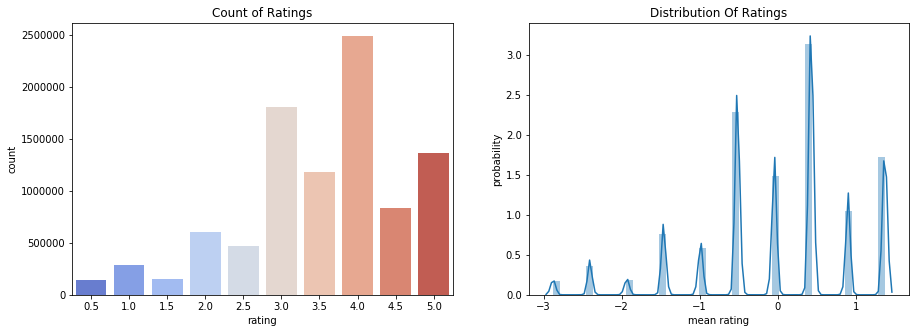

In [68]:
# a visual representation of the count and distribution of ratings

print('mean rating is:', train_movies_meta['rating'].mean())
scaler = StandardScaler()
x = train_movies_meta['rating'].values
scaler = scaler.fit_transform(x.reshape(-1, 1))
rating_scaled = pd.DataFrame(scaler, columns=['rating'])

fig, axis = plt.subplots(ncols=2, figsize=(15, 5))
ax = sns.countplot(x='rating', data=train_movies_meta, palette = 'coolwarm', ax=axis[0] ).set_title('Count of Ratings')
ax1 = sns.distplot(rating_scaled, ax=axis[1]).set_title('Distribution Of Ratings')
axis[1].set_xlabel('mean rating')
axis[1].set_ylabel('probability')
plt.show()

We have deduced that the ratings are not normally distrubuted and are skewed to the right suggesting that there are more rating higher than the mean of 3.5

In [69]:
# we will now see the number of ratings per movie
title_ratings_count = train_movies_meta.groupby('title')['rating'].count().reset_index()

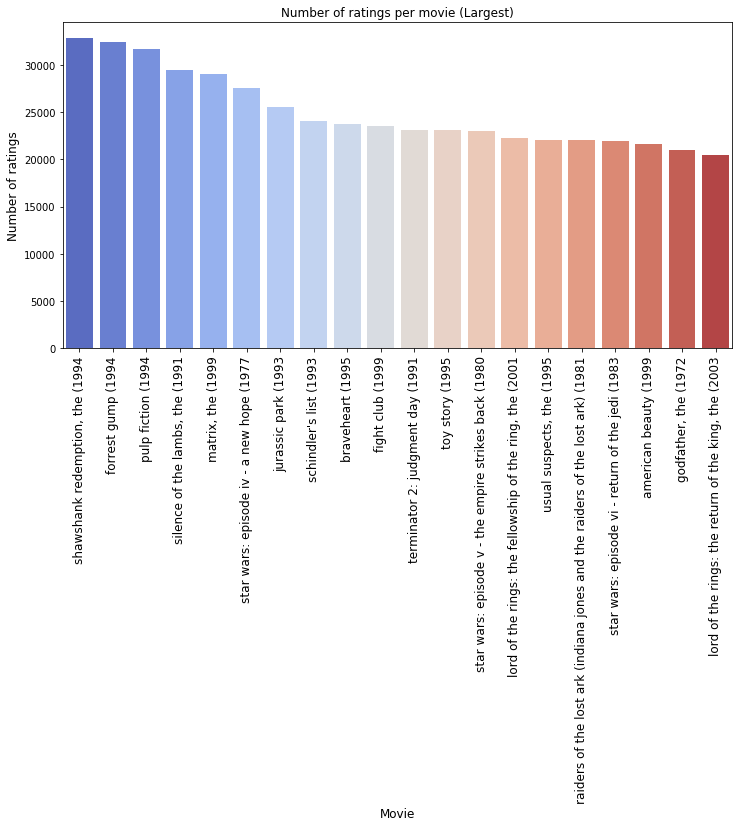

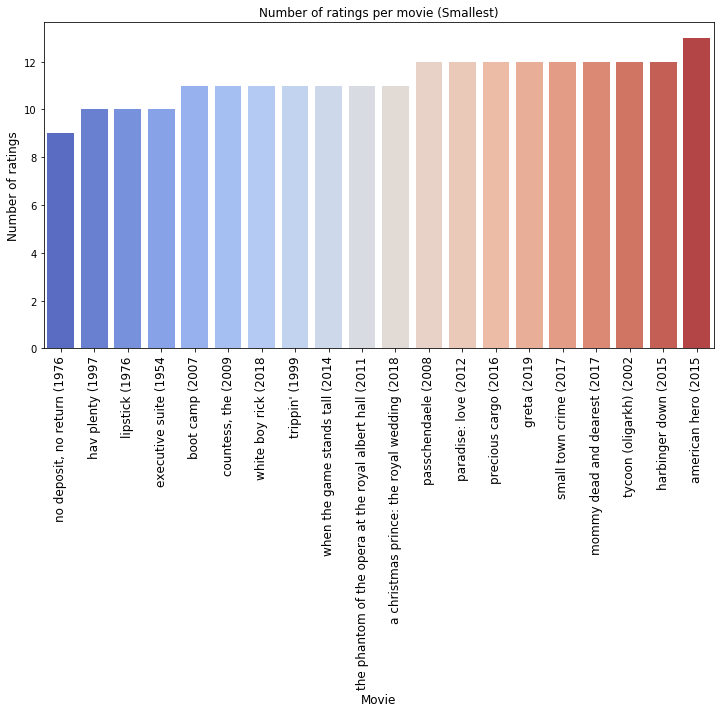

In [70]:
fig, axis = plt.subplots(figsize=(12, 6))

largest_r = title_ratings_count.sort_values(['rating'], ascending=False,).nlargest(20, columns=['rating'])
sns.barplot(x='title', y='rating', data = largest_r, palette = 'coolwarm').set_title('Number of ratings per movie (Largest)')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Number of ratings', fontsize=12)
plt.show()

fig, axis = plt.subplots(figsize=(12, 6))
smallest_r = title_ratings_count.sort_values(['rating'], ascending=False,).nsmallest(20, columns=['rating'])
sns.barplot(x='title', y='rating', data = smallest_r, palette = 'coolwarm').set_title('Number of ratings per movie (Smallest)')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Number of ratings', fontsize=12)
plt.show()

From this plot we can deduce that Shawshank Redemption has the highest ratings and no deposit no return has the lowest ratings count.

In [71]:
user_ratings_count = train_movies_meta.groupby('userId')['rating'].count().reset_index()
user_ratings_count.sort_values(['rating'])

,userId,rating
94816,94819,1
65570,65573,1
13807,13810,1
81031,81034,1
66976,66979,1
...,...,...
109728,109731,1967
33841,33844,2148
80971,80974,2387
20052,20055,2437


In [72]:
user_ratings_count_pdf = train_movies_meta.groupby('userId')['rating'].count().sort_values(ascending=False)


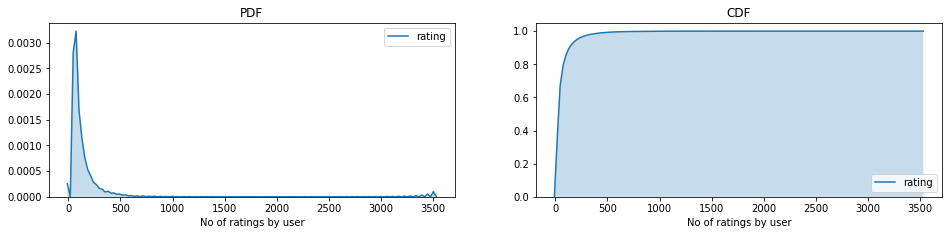

In [73]:
fig = plt.figure(figsize=plt.figaspect(0.2))

ax1 = plt.subplot(121)
sns.kdeplot(user_ratings_count_pdf, shade = True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title('PDF')

ax2 = plt.subplot(122)
sns.kdeplot(user_ratings_count_pdf, shade = True, cumulative=True, ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [74]:
user_ratings_count_pdf.describe()

count    162538.000000
mean         57.320836
std          90.306248
min           1.000000
25%          14.000000
50%          27.000000
75%          62.000000
max        3521.000000
Name: rating, dtype: float64

We can see here that majority of users had a low count of ratings and that 75% of users rated more than 62 movies.

In [75]:
quantiles = user_ratings_count_pdf.quantile(np.arange(0,1.01,0.01), interpolation = 'higher')

In [76]:
quantiles[::5]

0.00       1
0.05       7
0.10       9
0.15      11
0.20      12
0.25      14
0.30      16
0.35      18
0.40      20
0.45      23
0.50      27
0.55      31
0.60      37
0.65      43
0.70      51
0.75      62
0.80      77
0.85      98
0.90     134
0.95     208
1.00    3521
Name: rating, dtype: int64

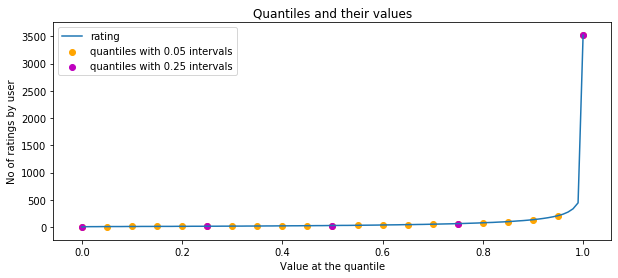

In [77]:
plt.rcParams.update({'figure.max_open_warning': 0})
fig = plt.figure(figsize=plt.figaspect(0.4))
plt.title('Quantiles and their values')
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label='quantiles with 0.05 intervals')
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label='quantiles with 0.25 intervals')
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

#for x, y in zip(quantiles.index[::25], quantiles[::25]):
    #plt.annotate(s='({}, {})'.format(x,y), xy=(x,y), xytext=(x-0.05, y+500), fontweight = 'bold')
    
plt.show()


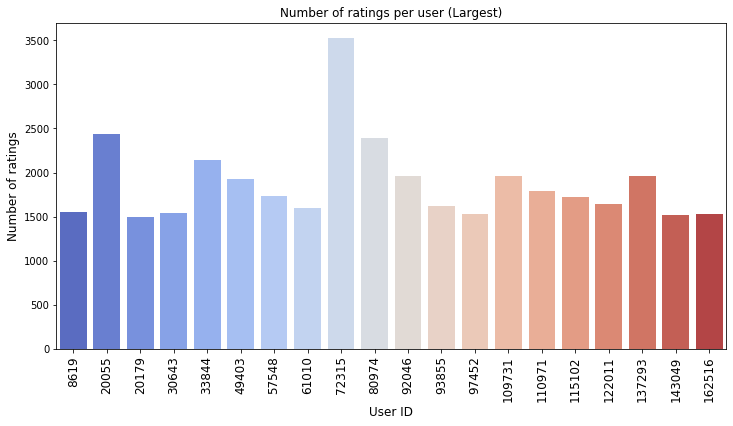

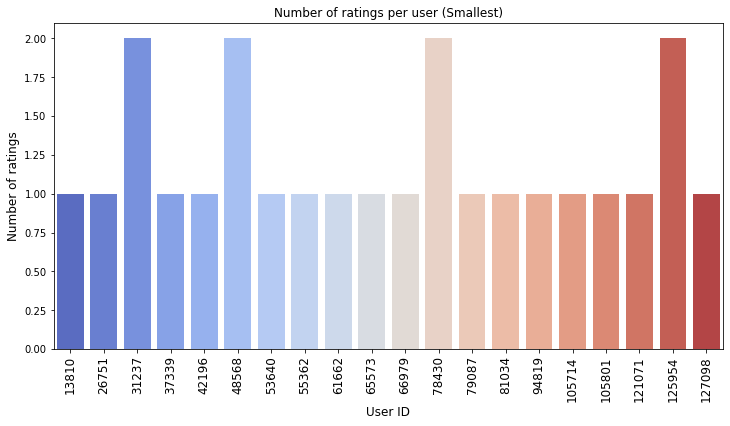

In [78]:
fig, axis = plt.subplots(figsize=(12, 6))

largest_r = user_ratings_count.sort_values(['rating'], ascending=False,).nlargest(20, columns=['rating'])
sns.barplot(x='userId', y='rating', data = largest_r, palette = 'coolwarm').set_title('Number of ratings per user (Largest)')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of ratings', fontsize=12)
plt.show()

fig, axis = plt.subplots(figsize=(12, 6))
smallest_r = user_ratings_count.sort_values(['rating'], ascending=False,).nsmallest(20, columns=['rating'])
sns.barplot(x='userId', y='rating', data = smallest_r, palette = 'coolwarm').set_title('Number of ratings per user (Smallest)')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of ratings', fontsize=12)
plt.show()

From the smallest bar plot, we can see that there are a number of users with just one rating. These users may not be able to add value to our model features further along. We can also see that one user has a high rating level. This should also be assessed later during our feature engineering

In [79]:
# vote average for each movie
vote_movie_average = train_movies_meta.groupby('title')['rating'].mean().reset_index()
vote_movie_average

,title,rating
0,"'burbs, the (1989",3.075954
1,'night mother (1986,3.381295
2,'round midnight (1986,3.620253
3,'salem's lot (2004,3.102941
4,'til there was you (1997,2.837321
...,...,...
10648,"zorro, the gay blade (1981",3.019231
10649,zulu (1964,3.863739
10650,¡three amigos! (1986,3.114637
10651,à nos amours (1983,3.588235


Text(0, 0.5, 'average ratings')

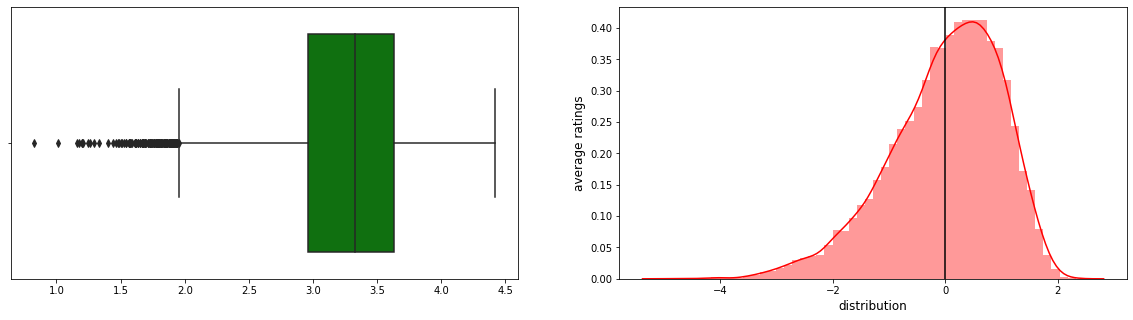

In [80]:
scaler = StandardScaler()
x = vote_movie_average['rating'].values
scaler = scaler.fit_transform(x.reshape(-1, 1))
votes_scaled = pd.DataFrame(scaler, columns=['rating_average'])
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x, color = 'green', ax=ax[0])
# ax[0].axvline(x.mean(), color='red')
sns.distplot(votes_scaled, color = 'red')
ax[1].axvline(0, color='black')
plt.xlabel('distribution', fontsize=12)
plt.ylabel('average ratings', fontsize=12)


From the normal distribution, we can tell that most of the votes are centered around the mean average ratings and that there exists outliers of lower ratings at the bottom.


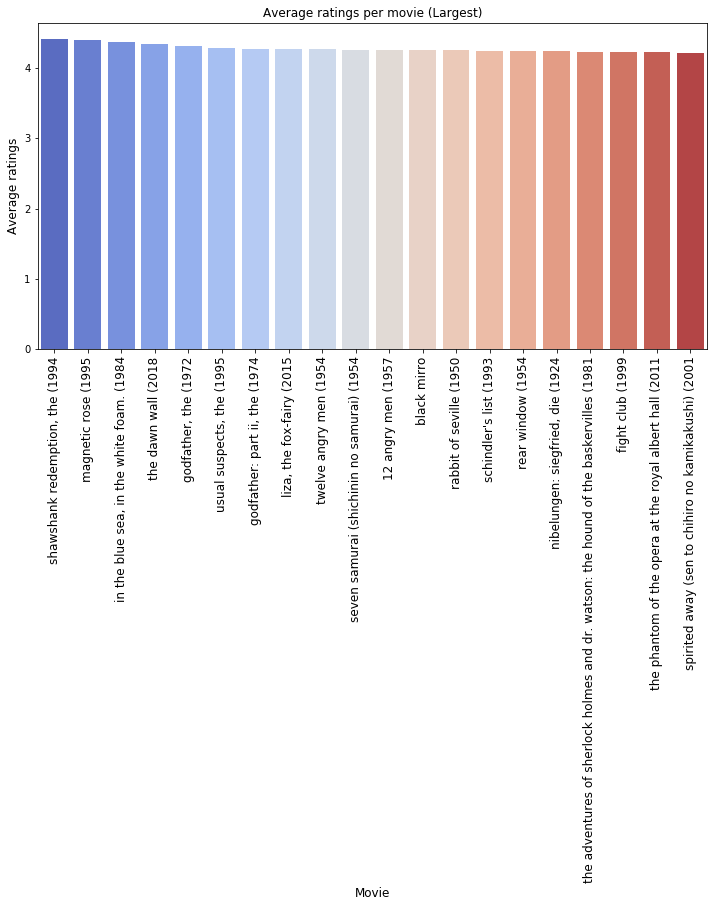

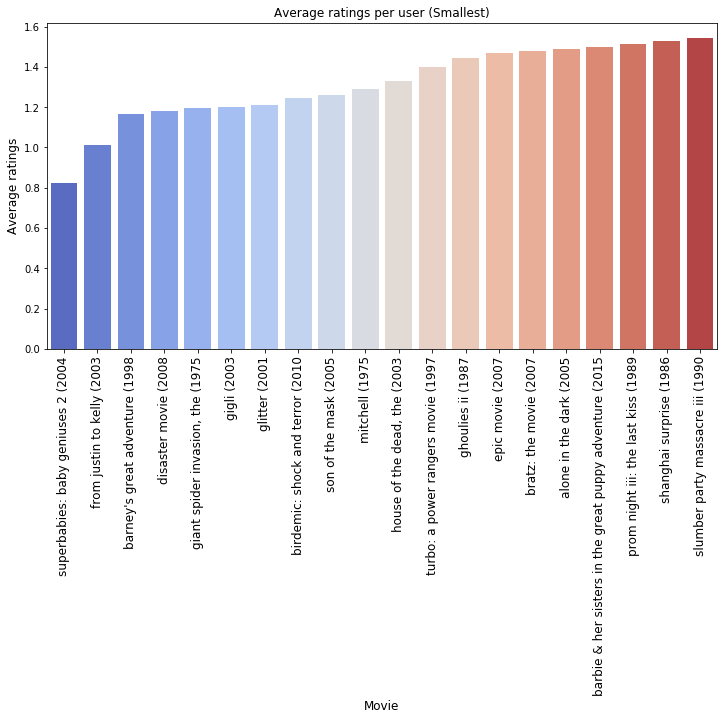

In [81]:
fig, axis = plt.subplots(figsize=(12, 6))

largest_votes = vote_movie_average.sort_values(['rating'], ascending=False,).nlargest(20, columns=['rating'])
sns.barplot(x='title', y='rating', data = largest_votes, palette = 'coolwarm').set_title('Average ratings per movie (Largest)')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Average ratings', fontsize=12)
plt.show()

fig, axis = plt.subplots(figsize=(12, 6))
smallest_votes = vote_movie_average.sort_values(['rating'], ascending=False,).nsmallest(20, columns=['rating'])
sns.barplot(x='title', y='rating', data = smallest_votes, palette = 'coolwarm').set_title('Average ratings per user (Smallest)')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Average ratings', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Movie rating with largest voting count')

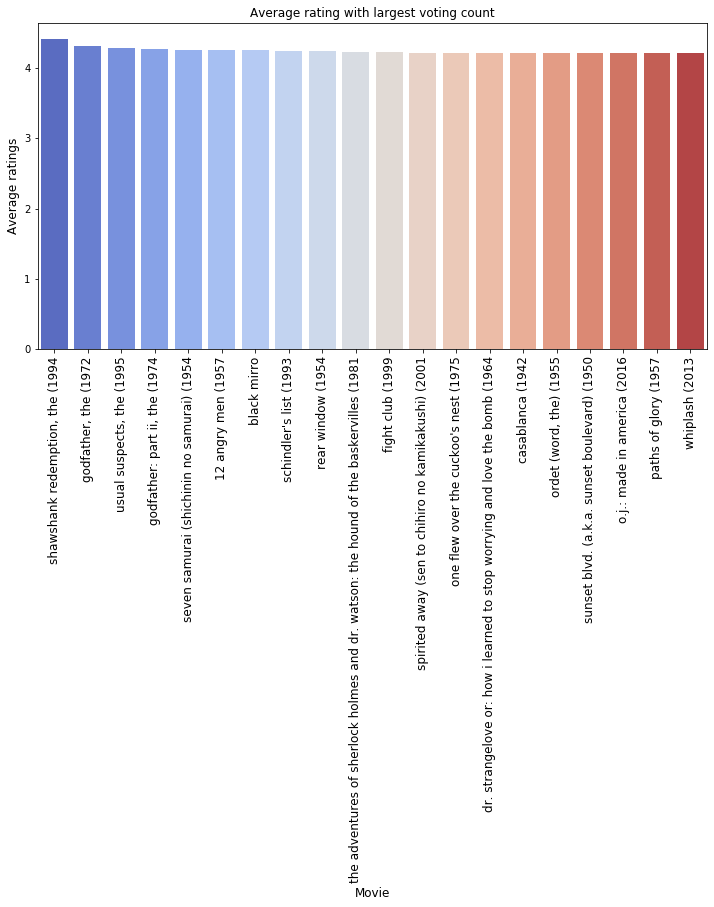

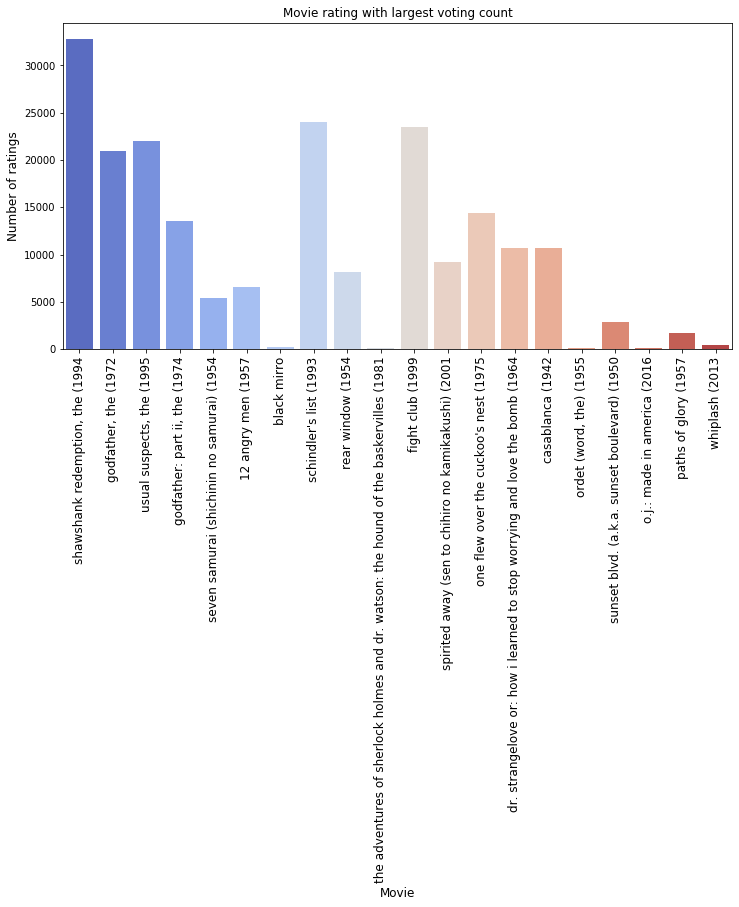

In [82]:
filtered_ratings = pd.merge(title_ratings_count, vote_movie_average, on = 'title')
count_threshold = 50
rating_popular_movie= filtered_ratings.query('rating_x >= @count_threshold')

fig, axis = plt.subplots(figsize=(12, 6))
sns.barplot(x = 'title', y = 'rating_y', data = rating_popular_movie.nlargest(20, columns = ['rating_y']), palette = 'coolwarm')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Average ratings', fontsize=12)
plt.title('Average rating with largest voting count')

fig, axis = plt.subplots(figsize=(12, 6))
sns.barplot(x = 'title', y = 'rating_x', data = rating_popular_movie.nlargest(20, columns = ['rating_y']), palette = 'coolwarm')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Number of ratings', fontsize=12)
plt.title('Movie rating with largest voting count')

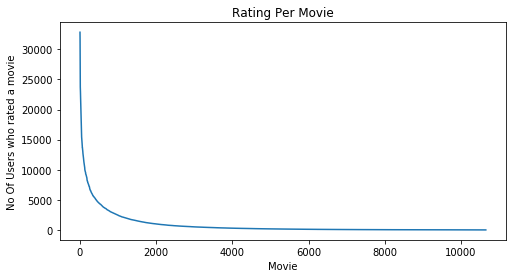

In [83]:
no_of_movie_ratings = train_movies_meta.groupby('movieId')['rating'].count().sort_values(ascending= False)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = plt.gca()
plt.plot(no_of_movie_ratings.values)
plt.title('Rating Per Movie')
plt.xlabel('Movie')
plt.ylabel('No Of Users who rated a movie')

plt.show()

If we compare our average ratings per movies with the filtered average ratings per movie, we can see that there are some movies that had a low number of ratings but got a high rating. This does not necessarily reflect the true nature of which movies are rated highly. We shall try adjust for this by a weighted average and see which movies rated the best. The skweness of both user ratings and movie ratings also shows that there are popular movies that are rated highly and a lot by a large proportion of our users.

In [84]:
v=filtered_ratings['rating_x']
R=filtered_ratings['rating_y']
C=filtered_ratings['rating_y'].mean()
m=filtered_ratings['rating_x'].quantile(0.70)

filtered_ratings['weighted_average']=((R*v)+(C*m)) / (v+m)

filtered_ratings

,title,rating_x,rating_y,weighted_average
0,"'burbs, the (1989",1310,3.075954,3.124291
1,'night mother (1986,139,3.381295,3.288435
2,'round midnight (1986,79,3.620253,3.312922
3,'salem's lot (2004,68,3.102941,3.240499
4,'til there was you (1997,209,2.837321,3.129257
...,...,...,...,...
10648,"zorro, the gay blade (1981",156,3.019231,3.199938
10649,zulu (1964,444,3.863739,3.555418
10650,¡three amigos! (1986,2521,3.114637,3.137349
10651,à nos amours (1983,17,3.588235,3.272210


Text(0.5, 1.0, 'Weighted Average Rating per Movie')

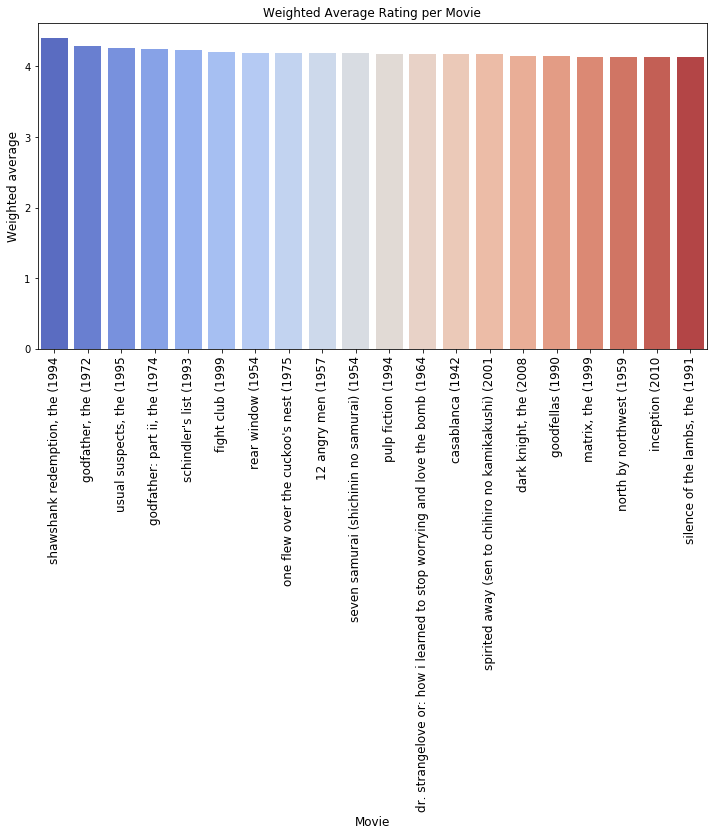

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'title', y = 'weighted_average', data = filtered_ratings.nlargest(20, columns = ['weighted_average']), palette = 'coolwarm')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Weighted average', fontsize=12)
plt.title('Weighted Average Rating per Movie')

As we suspected, the average weightings give the most accurate result on movie rating

Text(0.5, 1.0, 'Movie Preference For Viewer With Highest Views (Smallest)')

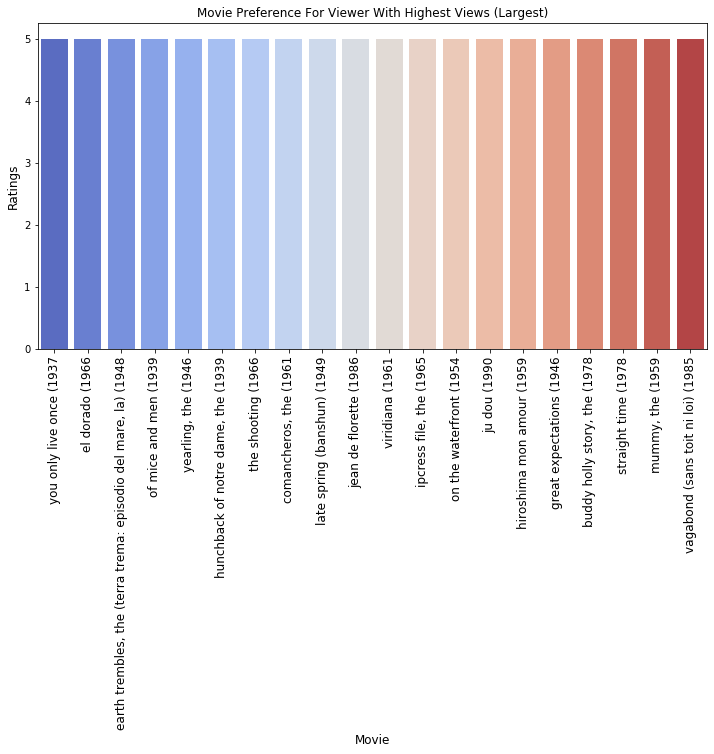

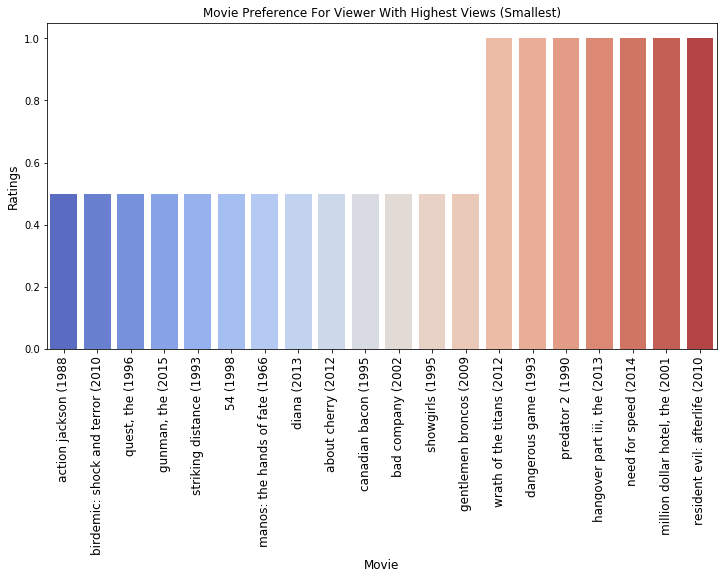

In [86]:
# we wil analyze the movies viewed by the user who viewed the most movies and see which were his/hers top 20 movie ratings and bottom 20
fan_user  = train_movies_meta[train_movies_meta['userId'] == 72315]

plt.figure(figsize=(12,6))

sns.barplot(x = 'title', y = 'rating', data = fan_user.nlargest(20, columns = ['rating']), palette = 'coolwarm')
plt.xticks(rotation = 90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.title('Movie Preference For Viewer With Highest Views (Largest)')

plt.figure(figsize=(12,6))
sns.barplot(x = 'title', y = 'rating', data = fan_user.nsmallest(20, columns = ['rating']), palette = 'coolwarm')
plt.xticks(rotation = 90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.title('Movie Preference For Viewer With Highest Views (Smallest)')

We are observing an interesting trend in that most movies that are rated highly, by both the top user and overall ratings are 'golden oldies.' We will visualise this by plotting the years in which the top 20 movies were released. We can also see that fairly new movies are rated lower. This is an interesting trend that should be further studied.

## Wordclouds

On this section we will be viewing the most popular, directors, actors and most freuest tags and keywords in our dataset.

In [87]:
def word_display (df, column_name):
    df = df.copy()
    text_df = " ".join(line for line in df[column_name])
    
    wordcloud = WordCloud( background_color="navy", width = 1920, height = 1080, colormap="rainbow", repeat=False).generate(text_df)

    plt.figure(dpi=260)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(column_name)
    plt.axis("off")
    return plt.show()

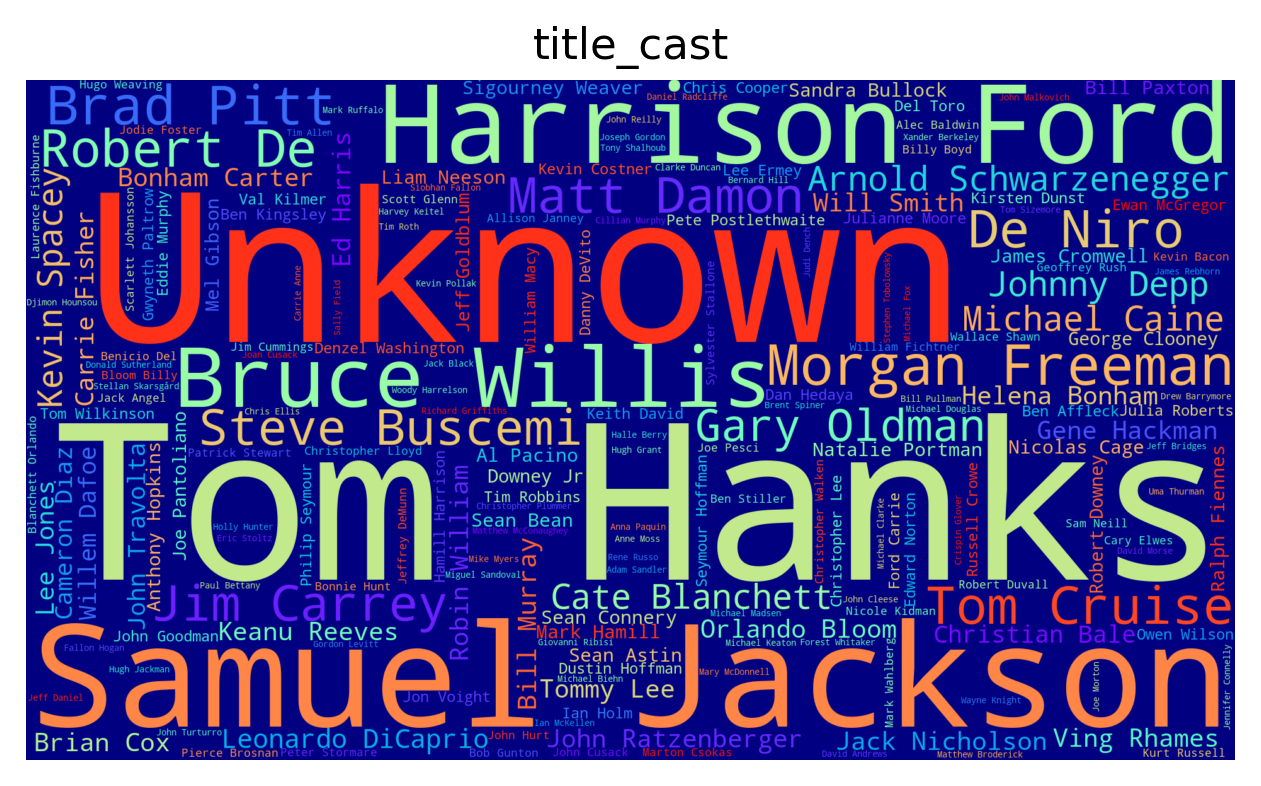

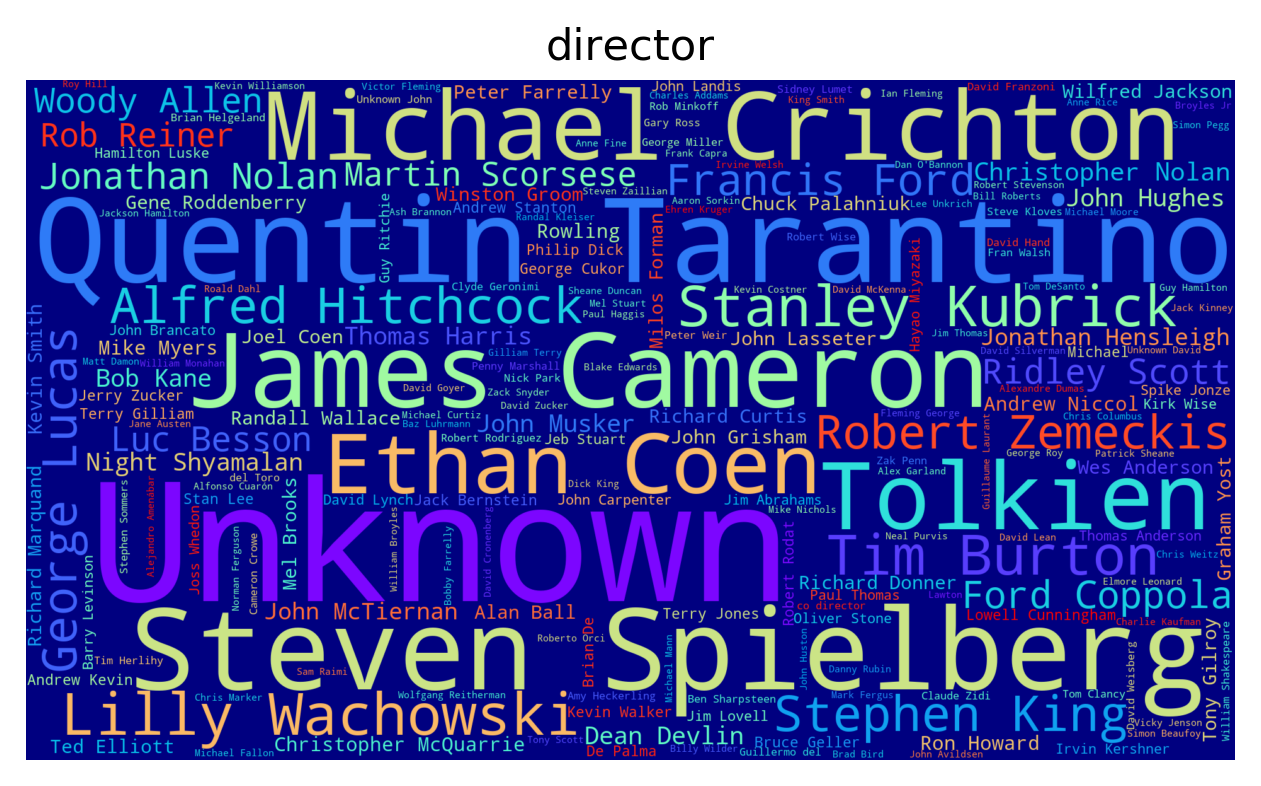

In [88]:
display_train = train_movies_meta[: 50000].copy()
display_train.reset_index(drop=True, inplace=True)
word_display(display_train, 'title_cast')
word_display(display_train, 'director')

### Budget And Release Year EDA

In [89]:
# analyze release year

print('Average release year of movies in our dataset:', round(train_movies_meta.release_year.mean()))

Average release year of movies in our dataset: 1994


In [90]:
release_year_analysis = train_movies_meta.drop_duplicates('movieId')

In [91]:
# this equals the number of unique titles so we can say we have all titles represented in this dataset for analysis
print('Number of unique titles in dataset:',len(release_year_analysis))


Number of unique titles in dataset: 10656


Text(0, 0.5, 'Count')

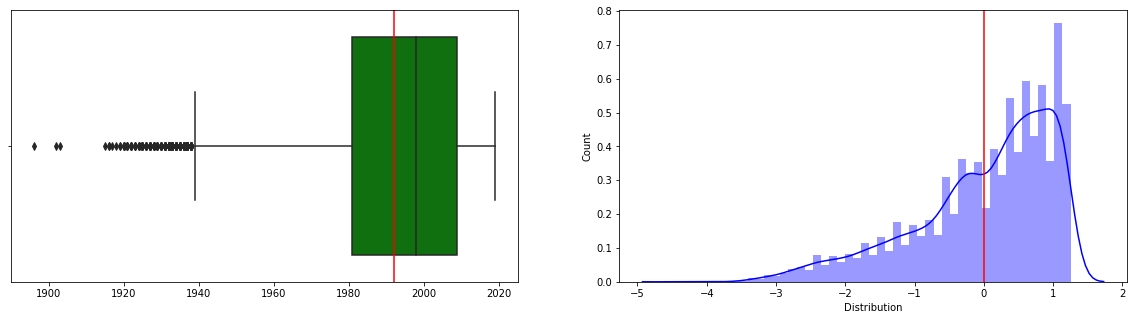

In [92]:
scaler = StandardScaler()
x = release_year_analysis['release_year'].values
scaler = scaler.fit_transform(x.reshape(-1, 1))
votes_scaled = pd.DataFrame(scaler, columns=['release_year'])

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x, color = 'green', ax=ax[0])
ax[0].axvline(x.mean(), color='red')
sns.distplot(votes_scaled, color = 'blue', ax=ax[1])
ax[1].axvline(0, color='red')
plt.xlabel('Distribution')
plt.ylabel('Count')



Our dataset is skewed to the right meaning that more movies below 1994 mean are our outliers in terms of when movies were released

Text(0, 0.5, 'Number of movies released')

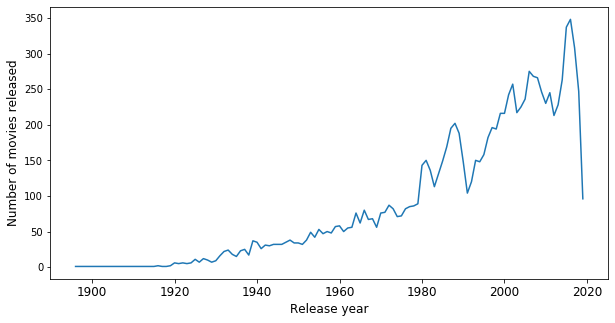

In [93]:
pct_title_year = release_year_analysis.groupby('release_year').agg({'title': 'count'}).reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='release_year', y = 'title', data = pct_title_year)
plt.xticks( fontsize=12)
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Number of movies released', fontsize=12)

We can see a gradual increase in movie releases each year. This could be due to different mediums available to which users are able to watch movies thus leading to more demand for content creation. We can also see that there was a large spike in the last few years before 2020. This could be due to the advent and adoption of more streaming services. 2020 decline could be attributed to a new year thus the movies of 2020 not being present in the dataset.

In [94]:
# plot budget throughout the years
budget_analysis = release_year_analysis.copy()

mean = budget_analysis['budget_price'].mean()
print(f'Mean of Budget for all movies: ${round(mean, 2)}')

print('Budget is biased to dollars but do note that budgets are priced in other currency. For simplicity we will assume its stated as dollars.')

Mean of Budget for all movies: $55746543.25
Budget is biased to dollars but do note that budgets are priced in other currency. For simplicity we will assume its stated as dollars.


Text(0, 0.5, 'Total Budget')

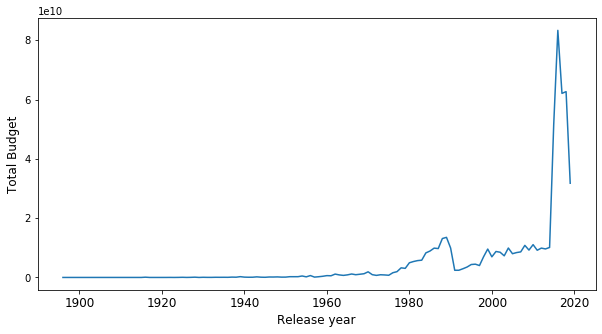

In [95]:
budget_per_year = budget_analysis.groupby('release_year').agg({'budget_price': 'sum'}).reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='release_year', y = 'budget_price', data = budget_per_year)
plt.xticks( fontsize=12)
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Total Budget', fontsize=12)

Text(0, 0.5, 'Budget')

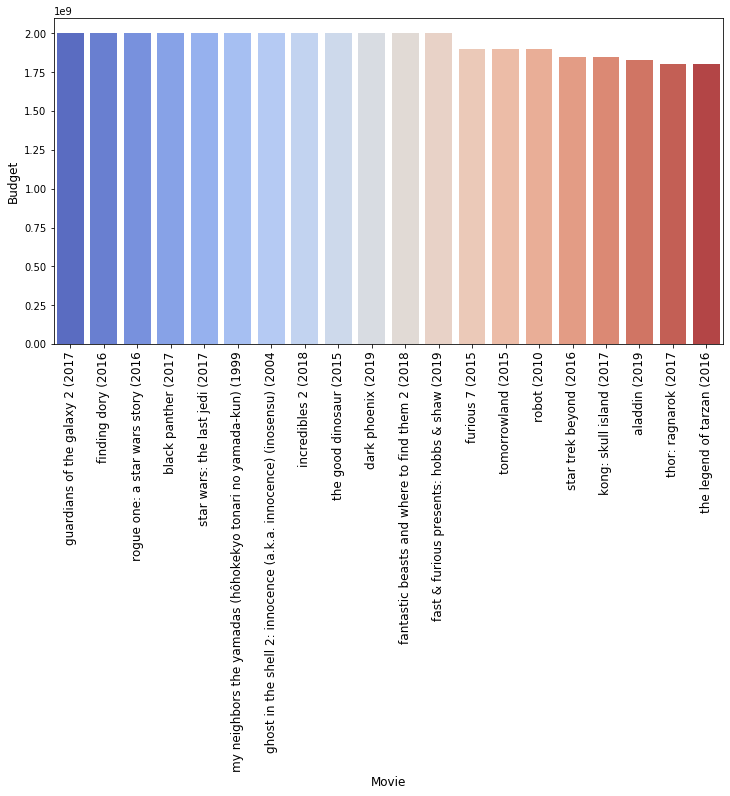

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot( x = 'title', y = 'budget_price', data = budget_analysis.nlargest(20, columns = 'budget_price'), palette = 'coolwarm')
plt.xticks(rotation = 90, fontsize=12)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Budget', fontsize=12)

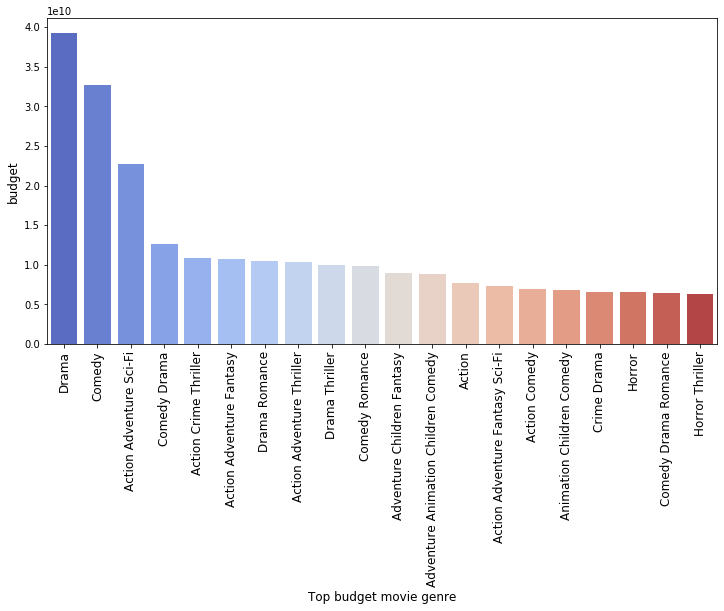

In [97]:
genre_budget_analysis = budget_analysis.groupby('genres').agg({'budget_price': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot( x = 'genres', y = 'budget_price', data = genre_budget_analysis.nlargest(20, columns = 'budget_price'), palette = 'coolwarm')
plt.xlabel('Top budget movie genre', fontsize=12)
plt.ylabel('budget', fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

### Genres EDA

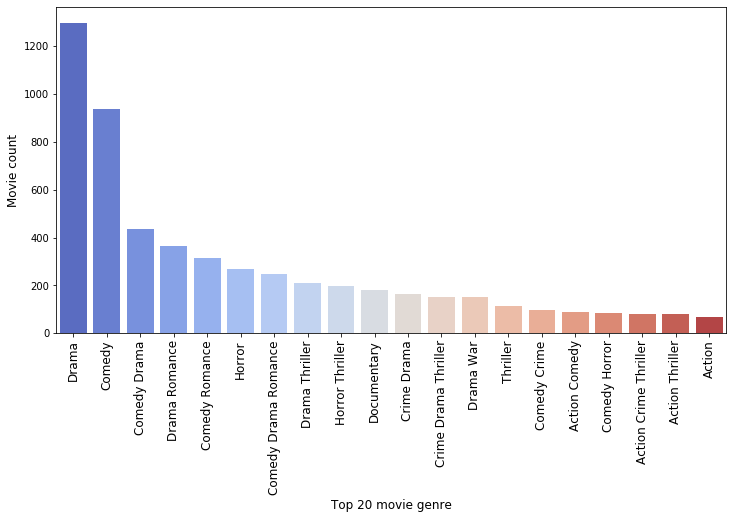

In [98]:
genre_analysis = release_year_analysis.groupby('genres')['title'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot( x = 'genres', y = 'title', data = genre_analysis.nlargest(20, columns = 'title'), palette = 'coolwarm')
plt.xlabel('Top 20 movie genre', fontsize=12)
plt.ylabel('Movie count', fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

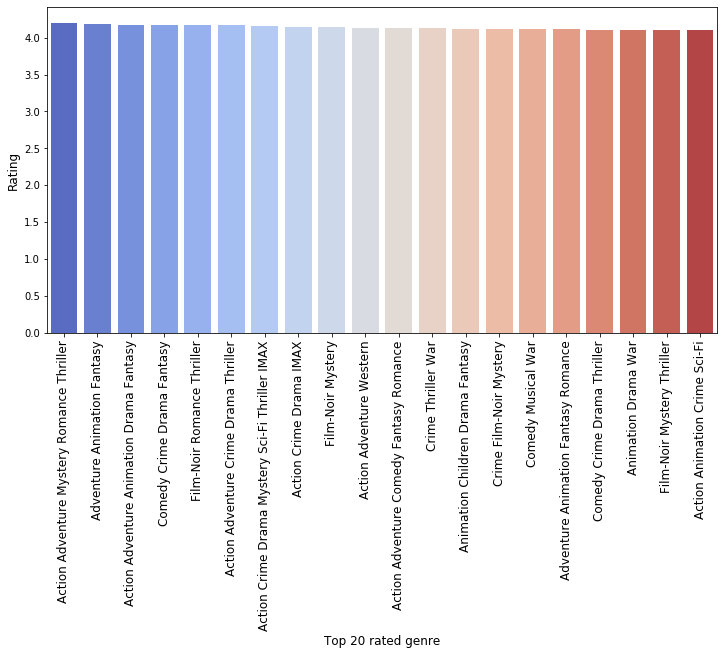

In [99]:
genre_rating_analysis = train_movies_meta[: 6000000].groupby('genres')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot( x = 'genres', y = 'rating', data = genre_rating_analysis.nlargest(20, columns = ['rating']), palette = 'coolwarm')
plt.xlabel('Top 20 rated genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

In [100]:
release_year_analysis[['title', 'genres', 'budget_price']].nlargest(20, columns = ['budget_price'])

,title,genres,budget_price
772,guardians of the galaxy 2 (2017,Action Adventure Sci-Fi,2000000000
2661,finding dory (2016,Adventure Animation Comedy,2000000000
3128,rogue one: a star wars story (2016,Action Adventure Fantasy Sci-Fi,2000000000
4942,black panther (2017,Action Adventure Sci-Fi,2000000000
5260,star wars: the last jedi (2017,Action Adventure Fantasy Sci-Fi,2000000000
9540,my neighbors the yamadas (hôhokekyo tonari no ...,Animation Comedy,2000000000
9681,ghost in the shell 2: innocence (a.k.a. innoce...,Action Animation Drama Sci-Fi Thriller,2000000000
19147,incredibles 2 (2018,Action Adventure Animation Children,2000000000
26488,the good dinosaur (2015,Adventure Animation Children Comedy Fantasy,2000000000
30892,dark phoenix (2019,Action Sci-Fi,2000000000


From viewing the last four charts, we can see that budgets stayed consisten throughout the years until the 2000s even though the number of movies released increased per year. This could be due to development of technology especially in the special effects space. Just by the move titles who boast the biggest budgets, we can see that they lie in action Sci-fi. Sci-fi movies require a lot of special effects and extra costs in post production due to the amount of work required. With an increase in computational power of computers, new software and hardware, we can now see why there is a huge spike in budgets within the recent 10 years or so.

### Viewership EDA

In [101]:
def time_segmentation(x):
    """This function converts time features into their respectively sections
    
    Arg:
        x: Datetime feature
    
    Returns:
        Specific period of the day
    """
    
    if x> time(0, 0, 0) and x<= time(4, 0, 0):
        return 'After Hours'
    if x>time(4,0, 0) and x<= time(10, 0, 0):
        return 'Early Morning'
    if x>time(10,0,0) and x<= time(13,0,0):
        return 'Late Morning'
    if x>time(13,0,0) and x<= time(16,0,0):
        return 'Afternoon'
    if x>time(16, 0,0) and x<= time(20,0,0):
        return 'Evening'
    if x > time(20,0,0) and x<= time(23,59,59):
        return 'Late Evening'
    else:
        return 'Time'


In [102]:
train_movies_meta['time_viewed_seg'] = train_movies_meta['time_viewed'].apply(time_segmentation) 

In [103]:
time_viewed = train_movies_meta.iloc[:6000000].groupby('time_viewed_seg')['title'].count().reset_index()


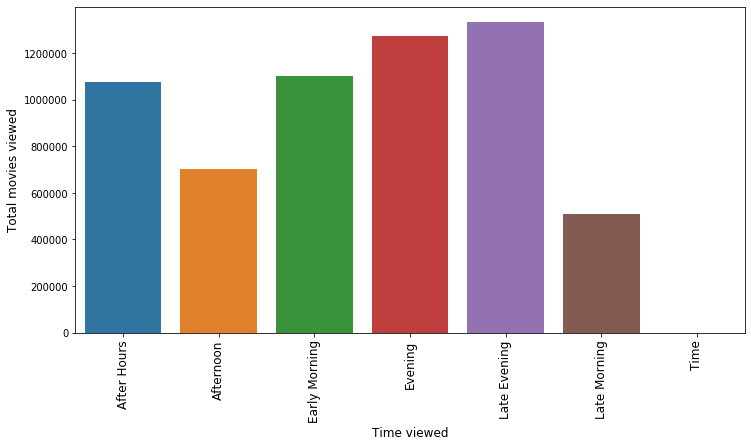

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'time_viewed_seg', y = 'title', data = time_viewed)
plt.xlabel('Time viewed', fontsize=12)
plt.ylabel('Total movies viewed', fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

By taking a subset of the data, we can analyze the time that most users view movies. We will assume that the time is standardized throughout all time zones. We can see that evening time is te time that most people view movies which makes sense as its usually the time new releases are introduced on tv and its time after work and could be for leisure. Afternoon time is the lowest which makes sense. This could give us good reference to the profile of our viewers. They could be professionals since they have more time to view movies during the day. This could also provide more insight into the age of our users and their affiliation with rating older movies higher than new movies.

In [105]:
time_viewed_ratings = train_movies_meta.iloc[:6000000].groupby('time_viewed_seg')['rating'].mean().reset_index()


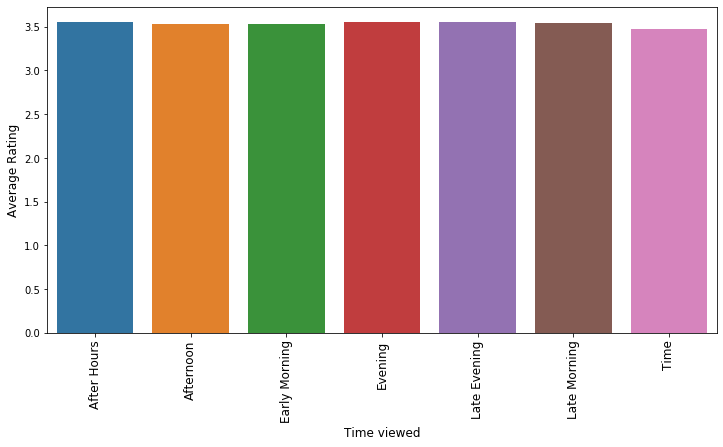

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'time_viewed_seg', y = 'rating', data= time_viewed_ratings)
plt.xlabel('Time viewed', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

we can see that the time a movie was viewed does not affect the ratings

Text(0.5, 0, 'Year difference')

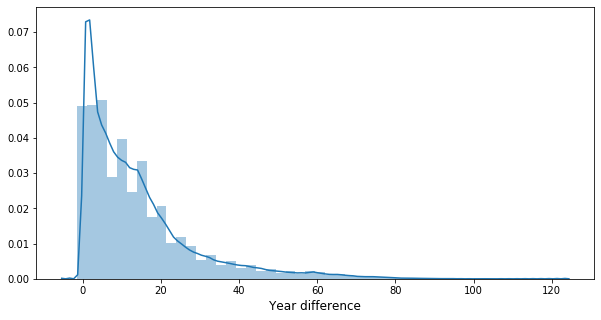

In [107]:
plt.figure(figsize=(10, 5))
sns.distplot(train_movies_meta['year_difference'])
plt.xlabel('Year difference', fontsize=12)


In [108]:
print('Mean year difference betweent year a movie was watched and when it was released:', round(train_movies_meta['year_difference'].mean(), 0), 'years')

print('Mean year movies were viewed:', round(train_movies_meta['viewership_year'].mean(), 0), 'years')

Mean year difference betweent year a movie was watched and when it was released: 14.0 years
Mean year movies were viewed: 2008.0 years


From the timestamp from user info, we can assume that these are the times where the user viewed movies. We can see that the average time is 14 years. This is interesting as it might show when these movies were viewed. 2008 is the mean year in which most movies were viewed. It also shows the time where most of the data was collected for users. The year viewed is not normally distributed between 2008 and the graph above shows that most movies are viewed closer to the time they are released and that the older movies viewed are not viewed in recent times. This also gives us an indication on when the user data were gathered.

## 7. Base Model

### Content-based filtering

In [109]:
rating_movie = train_movies_meta.iloc[:10000] ## in order to run this section, we will take a subset of the data

We drop the unnecessary columns and prepare to better clean what is left

In [110]:
rating_movie.drop(columns=['timestamp', 'runtime'], inplace=True)

Let's  convert them into a form that is more usable. More specifically, these are the transformations we will be looking to perform:
Convert keywords into a list of strings where each string is a keyword (similar to genres)
Convert cast into a list of strings where each string is a star.

In [111]:
def cleaner(df, column):
    df[column] = df[column].fillna(' ')
    new = []
    for x in df[column]:
        new.append(' '.join(x.split('|')))
    df[column] = new
    return df

In [112]:
cleaner(rating_movie, 'genres')
cleaner(rating_movie, 'title_cast')
cleaner(rating_movie, 'plot_keywords').head()

,userId,movieId,rating,tags,title,genres,plot_keywords,title_cast,director,release_year,viewership_year,time_viewed,year_difference,budget_price,time_viewed_seg
0,5163,57669,4.0,chase clever comedy dialogue excellent excelle...,in bruges (2008,Comedy Crime Drama Thriller,dwarf bruges irish hitman,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Martin McDonagh,2008,2018,11:53:12,10,15000000,Late Morning
1,106343,5,4.5,catastrophe chase comedy cute cute! destiny fa...,father of the bride part ii (1995,Comedy,fatherhood doberman dog mansion,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,1995,2008,02:18:59,13,30000000,After Hours
2,146790,5459,5.0,action adventure catastrophe chase comedy crea...,men in black ii (a.k.a. miib) (a.k.a. mib 2) (...,Action Comedy Sci-Fi,lingerie michael jackson character shorthaired...,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Lowell Cunningham,2002,2004,04:45:39,2,140000000,Early Morning
3,106362,32296,2.0,catastrophe comedy funny happy ending original...,miss congeniality 2: armed and fabulous (2005,Adventure Comedy Crime,female protagonist cleave gag good woman fbi,Sandra Bullock Regina King Enrique Murciano Wi...,Marc Lawrence,2005,2015,09:36:05,10,45000000,Early Morning
4,9041,366,3.0,chase great ending original storytelling scary...,wes craven's new nightmare (nightmare on elm s...,Drama Horror Mystery Thriller,freddy krueger elm street famous director as h...,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Wes Craven,1994,1996,13:17:17,2,8000000,Afternoon


In the subsequent steps, we are going to use a vectorizer to build document vectors. If two actors had the same first name (say, Ryan Reynolds and Ryan Gosling), the vectorizer will treat both Ryans as the same, although they are clearly different entities. This will impact the quality of the recommendations we receive. If a person likes Ryan Reynolds' movies, it doesn't imply that they like movies by all Ryans.

Therefore, the last step is to strip the spaces between keywords, and actor and director names, and convert them all into lowercase. Therefore, the two Ryans in the preceding example will become ryangosling and ryanreynolds, and our vectorizer will now be able to distinguish between them:


In [113]:
def sanitize(df, column):
    lowered = []
    for x in df[column]:
        lowered.append(x.lower())
    df[column] = lowered
    return df

In [114]:
features = ['title', 'genres', 'title_cast', 'director', 'plot_keywords']
sanitize(rating_movie, 'title')
sanitize(rating_movie, 'genres')
sanitize(rating_movie, 'title_cast')
sanitize(rating_movie, 'director')
sanitize(rating_movie, 'plot_keywords').head()

,userId,movieId,rating,tags,title,genres,plot_keywords,title_cast,director,release_year,viewership_year,time_viewed,year_difference,budget_price,time_viewed_seg
0,5163,57669,4.0,chase clever comedy dialogue excellent excelle...,in bruges (2008,comedy crime drama thriller,dwarf bruges irish hitman,elizabeth berrington rudy blomme olivier bonjo...,martin mcdonagh,2008,2018,11:53:12,10,15000000,Late Morning
1,106343,5,4.5,catastrophe chase comedy cute cute! destiny fa...,father of the bride part ii (1995,comedy,fatherhood doberman dog mansion,steve martin diane keaton martin short kimberl...,albert hackett,1995,2008,02:18:59,13,30000000,After Hours
2,146790,5459,5.0,action adventure catastrophe chase comedy crea...,men in black ii (a.k.a. miib) (a.k.a. mib 2) (...,action comedy sci-fi,lingerie michael jackson character shorthaired...,tommy lee jones will smith rip torn lara flynn...,lowell cunningham,2002,2004,04:45:39,2,140000000,Early Morning
3,106362,32296,2.0,catastrophe comedy funny happy ending original...,miss congeniality 2: armed and fabulous (2005,adventure comedy crime,female protagonist cleave gag good woman fbi,sandra bullock regina king enrique murciano wi...,marc lawrence,2005,2015,09:36:05,10,45000000,Early Morning
4,9041,366,3.0,chase great ending original storytelling scary...,wes craven's new nightmare (nightmare on elm s...,drama horror mystery thriller,freddy krueger elm street famous director as h...,jeff davis heather langenkamp miko hughes matt...,wes craven,1994,1996,13:17:17,2,8000000,Afternoon


We have four features to work with, of which three are lists and one is a string. What we need to do is create a soup that contains the actors, director, keywords, and genres. This way, we can feed this soup into our vectorizer and perform similar follow-up steps to before:

In [115]:
def create_soup(x):
    return x['plot_keywords'] + ' ' +x['title_cast'] + ' ' +x['director'] + ' ' + x['genres'] 

In [116]:
rating_movie['soup'] = rating_movie.apply(create_soup, axis=1)

In [117]:
titles = rating_movie['title']
indices = pd.Series(rating_movie.index, index=rating_movie['title'])

With the soup created, we are now in a good position to create our document vectors, compute similarity scores, and build the metadata-based recommender function.

Instead of using TF-IDFVectorizer, we will be using CountVectorizer. This is because using TF-IDFVectorizer will accord less weight to actors and directors who have acted and directed in a relatively larger number of movies.
This is not desirable, as we do not want to penalize artists for directing or appearing in more movies:

In [118]:
#Define a new CountVectorizer object and create vectors for the soup
count = CountVectorizer(stop_words='english')

count_matrix = count.fit_transform(rating_movie['soup'])


Unfortunately, using CountVectorizer means that we are forced to use the more computationally expensive cosine_similarity function to compute our scores:

In [119]:
#cosine_sim = cosine_similarity(count_matrix, count_matrix)

This is how we find our recommendations:

In [ ]:
def content_recommender(title, cosine_sim=cosine_sim, df=df, indices=indices):# Function that takes in movie title as input and gives recommendations     # Obtain the index of the movie that matches the title  
    idx = indices[title]  
    # Get the pairwsie similarity scores of all movies with that movie 
    # And convert it into a list of tuples as described above    
    sim_scores = list(enumerate(cosine_sim[idx]))  
  
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)    # Sort the movies based on the cosine similarity scores   
    # Get the scores of the 10 most similar movies. Ignore the first movie.    
    sim_scores = sim_scores[1:11] 
  
    movie_indices = [i[0] for i in sim_scores]    # Get the movie indices 
    # Return the top 10 most similar movies    
    return df['title'].iloc[movie_indices]  


We have to change the above two cells to markdowns because due to the size of the dataframe, the similarity matrix is too big as such the notebook crashes before it is able to calculate it. We abandon the content-based filtering approach and concentrate on collaborative filtering.

## Collaborative filtering

### MovieData Baseline Model

Inititally we coded a model from scratch, the code is shown below, but due to the fact that the code takes ~5 hours to run, we decided to look for something better.

In [ ]:
## Run on Kaggle
def load_reviews(path):
    """
    Loads Movie reviews
    """
    
    parse_date = lambda r,k: datetime.datetime.fromtimestamp(float(r[k]))
    parse_int = lambda r,k: int(float(r[k]))

    with open(path, newline='', encoding='ISO-8859-1') as reviews:
        reader = csv.DictReader(reviews)
        for row in reader:
            row['movieId'] = parse_int(row, 'movieId')
            row['userId'] = parse_int(row, 'userId')
            row['rating'] = parse_int(row, 'rating')
            row['timestamp'] = parse_date(row, 'timestamp')
            yield row
def load_test(path):
    """
    Loads test df
    """
    
    parse_date = lambda r,k: datetime.datetime.fromtimestamp(float(r[k]))
    parse_int = lambda r,k: int(float(r[k]))

    with open(path, newline='', encoding='ISO-8859-1') as reviews:
        reader = csv.DictReader(reviews)
        for row in reader:
            row['userId'] = parse_int(row, 'userId')
            row['movieId'] = parse_int(row, 'movieId')
            yield row
def relative_path(path):
    """
    Returns a path relative from this code file
    """
    dirname = os.path.dirname(os.path.realpath('__file__'))
    path = os.path.join(dirname, path)
    return os.path.normpath(path)
def load_movies(path):
    
    parse_int = lambda r,k: int(r[k])
    
    with open(path, newline='', encoding='ISO-8859-1') as movies:
        reader = csv.DictReader(movies)
        for row in reader:
            row['movieId'] = parse_int(row, 'movieId')
            yield row
from collections import defaultdict
import re
from math import sqrt
import heapq
from operator import itemgetter
class MovieData(object):
    """
    Data structure to build recommender model on
    """
    
    def __init__(self, train_csv, movies_csv, description=None):
        """
        Instantiate with a path to train.csv and movies.csv
        """
        self.train_csv = train_csv
        self.movies_csv = movies_csv
        self.movies = {}
        self.reviews = defaultdict(dict)
        self.load_dataset()
        
    def dump(self, pickle_path):
        """
        Dump the object into a serialized file using the pickle module.
        This will allow us to quickly reload our model in the future.
        """
        with open(pickle_path, 'wb') as pkl:
            pickle.dump(self, pkl)
        
    def load_dataset(self):
        """
        Loads the 2 dataset into memory, indexed on the ID
        """
        for movie in tqdm(load_movies(self.movies_csv)):
            self.movies[movie['movieId']] = movie
                
        for review in tqdm(load_reviews(self.train_csv)):
            self.reviews[review['userId']][review['movieId']] = review
            
    def review_for_movie(self, movieid):
        """
        Yields the reviews for a given movie
        """
        for review in self.reviews.values():
            if movieid in review:
                yield review[movieid]
    
    def average_reviews(self):
        """
        Averages the rating score for all movies. Yields a tuple of movieid, the
        average rating, and the number of reviews
        """
        for movieid in self.movies:
            reviews = list(r['rating'] for r in self.review_for_movie(movieid))
            if len(reviews) > 0:
                average = sum(reviews) / float(len(reviews))
                yield movieid, average, len(reviews)
            else:
                pass
    
    def bayesian_average(self, c=59, m=3):
        """
        Reports the Bayesian average with parameters c and m.
        """
        for movieid in self.movies:
            reviews = list(r['rating'] for r in self.review_for_movie(movieid))
            average = ((c * m) + sum(reviews)) / float(c + len(reviews))
            yield movieid, average, len(reviews)
            
    def top_rated(self, n=10):
        """
        Yields the n top rated movies
        """
        return heapq.nlargest(n, self.average_reviews(), key=itemgetter(1))
    
    def shared_preferences(self, criticA, criticB):
        """
        Returns the intersection of ratings for two critics, A and B.
        """
        if criticA not in self.reviews:
            raise KeyError("Couldn't fint critic '%s' in data" %criticA)
        if criticB not in self.reviews:
            raise KeyError("Couldn't fint critic '%s' in data" %criticB)
        
        moviesA = set(self.reviews[criticA].keys())
        moviesB = set(self.reviews[criticB].keys())
        shared = moviesA & moviesB # Intersection operator
        
        # Creaet a reviews dictionary to return
        r = {}
        for movieid in shared:
            r[movieid] = (
                self.reviews[criticA][movieid]['rating'], self.reviews[criticB][movieid]['rating']
            )
        return r
    
    def shared_critics(self, movieA, movieB):
        """
        Returns the intersection of critics for two items, A and B
        """
        
        if movieA not in self.movies:
            raise KeyError("Couldn't find movie '%s' in data" % movieA)
        if movieB not in self.movies:
            raise KeyError("Couldn't find movie '%s' in data" % movieB)
            
        criticsA = set(critic for critic in self.reviews if movieA in self.reviews[critic])
        criticsB = set(critic for critic in self.reviews if movieB in self.reviews[critic])
        shared = criticsA & criticsB #Intersection operator
        
        # Create the reviews dictionary to return
        r = {}
        for critic in shared:
            r[critic] = (
                self.reviews[critic][movieA]['rating'],
                self.reviews[critic][movieB]['rating']
            )
        return r
    
    def similar_items(self, movie, metric='euclidean', n=None):
        # Metric jump table
        metrics = {
            'euclidean': self.euclidean_distance,
            'pearson': self.pearson_correlation,
        }
        
        distance = metrics.get(metric, None)
        
        # Handle problems that might occur
        if movie not in self.reviews:
            raise KeyError("Unknown movie, '%s'." % movie)
        if not distance or not callable(distance):
            raise KeyError("Unknown or unprogrammed distance metric '%s'." % metric)
            
        items = {}
        for item in self.movies:
            if item == movie:
                continue
        items[item] = distance(item, movie, prefs='movies')
        
        if n:
            return heapq.nlargest(n, items.items(), key=itemgetter(1))
        return items
    
    def euclidean_distance(self, criticA, criticB, prefs='users'):
        """
        Reports the Euclidean distance of two critics, A and B by perfoming a J-dimensional
        Euclidean calculation of each of their preference vectors for the intersection of movies
        the critics have rated.
        """
        # Get the intersection of the rated titles in the data.
        
        if prefs == 'users':
            preferences = self.shared_preferences(criticA, criticB)
        elif prefs == 'movies':
            preferences = self.shared_critics(criticA, criticB)
        else:
            raise ExceptionError("No preferences of type '%s'." % prefs)
        if len(preferences) == 0:
            return 0
        
        # Sum the squares of the differences
        sum_of_squares = sum([pow(a-b, 2) for a,b in preferences.values()])
        
        # Return the inverse of the distance to give a higher score to users who are similar (e.g. less distance)
        # add 1 to prevent by zero errors and normalize ranks in [0, 1]
        return 1/(1+sqrt(sum_of_squares))
    
    def pearson_correlation(self, criticA, criticB, prefs='users'):
        """
        Returns the Pearson Correlation of two critics, A and B by performing the PPMC
        calculation on the scatter plot of (a,b) ratings on the shared set of critiqued titles.
        """
        
        # Get the set of mutually rated movies
        if prefs == 'users':
            preferences = self.shared_preferences(criticA, criticB)
        elif prefs == 'movies':
            preferences = self.shared_critics(criticA, criticB)
        else:
            raise Exception("No preferences of type '%s'" % prefs)
            
        # Store the lenth to save transversals of len computation/
        # If they have no rankings in common, return 0.
        length = len(preferences)
        if length == 0:
            return 0
        
        
        # Loop through the preferences of each critic once and compute the various summations
        # that are required for final calculation.
        sumA = sumB = sumSquareA = sumSquareB = sumProducts = 0
        for a, b in preferences.values():
            sumA += a
            sumB += b
            sumSquareA += pow(a, 2)
            sumSquareB += pow(b, 2)
            sumProducts += a*b
            
            # CAcula Pearson Score
            numerator = (sumProducts*length) - (sumA*sumB)
            denominator = sqrt(((sumSquareA*length) - pow(sumA, 2)) * ((sumSquareB*length) - pow(sumB, 2)))
            
            # prevet dividion by zero
            if denominator == 0:
                return 0
            
        return abs(numerator / denominator)
        
    def similar_critics(self, user, metric='euclidean', n=None):
        """
        Finds and ranks similar critics for the user according to the
        specified distance metric. Returns n simiar critics.
        """
        
        # Metric jump table
        metrics = {
            'euclidean': self.euclidean_distance, 'pearson': self.pearson_correlation,
        }
            
        distance = metrics.get(metric, None)
            
        # Handle problems that might occur
        if user not in self.reviews:
            raise KeyError("Unkown user, '%s'." % user)
        if not distance or not callable(distance):
            raise KeyError("Unknown or unprogrammed distance metric '%s'." % metric)
            
        # Compute user to critic similarities for all critics
        critics = {}
        for critic in self.reviews:
            
            if critic == user:
                continue
            else:
                critics[critic] = distance(user, critic)
            
            if n:
                return heapq.nlargest(n, critics.items(), key=itemgetter(1))
        return critics
        
    def predict_items_recommendation(self, user, movie, metric='euclidean'):
        movies = self.similar_items(movie, metric=metric)
        total  = 0.0
        simsum = 0.0

        for relmovie, similarity in movies.items():
            # Ignore movies already reviewed by user
            if relmovie in self.reviews[user]:
                total  += similarity * self.reviews[user][relmovie]['rating']
                simsum += similarity

        if simsum == 0.0: return 0.0
        return round(total / simsum, 1)
    
    def predict(self, test_array, metric='euclidean'):
        return [
            self.predict_items_recommendation(test_array[i][0], test_array[i][1])
            for i in range(test_array.shape[0])
        ]
    
    
data = train_csv = relative_path('../input/edsa-recommender-system-predict/train.csv')
item = movies_csv = relative_path('../input/edsa-recommender-system-predict/movies.csv')
model = MovieData(data, item)

predictions = model.predict(test.values)

### SVD Baseline Model

We considered the surprise package's SVD model, which is very convinient. We decided to go with this one because it is computational efficient.

In [123]:
## Comet Experiment
experiment = Experiment(api_key='NoaKQBeRULRbxBslknSCIKQXp',
                       project_name = 'team-rm5-movie-recommender-system', workspace='kopano-m',
                       auto_param_logging = True, auto_metric_logging = True)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kopano-m/team-rm5-movie-recommender-system/6468efab92dd4a7ea7f1642905f97e7b



In [124]:

new_df= train
new_df.shape

(10000038, 5)

The main thing the $Reader$ class does is to specify the range of the reviews. Let's first check the range of the reviews for this dataset.

In [125]:
lower_rating = new_df['rating'].min()
upper_rating = new_df['rating'].max()
print('Rating range: {0} to {1}'.format(lower_rating, upper_rating))

Rating range: 0.5 to 5.0


So our review range goes from 0.5 to 5, which is a little non-standard (the default for $surprise$ is 1-5). So we will need to change this when we load in our dataset, which is done like this:

In [ ]:
reader= Reader(rating_scale=(lower_rating,upper_rating))
data= Dataset.load_from_df(new_df[['userId','movieId', 'rating']],reader)

In [ ]:
trainset,testset= train_test_split(data, test_size=0.20)
model= SVD()
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
#from sklearn.metrics import mean_squared_error
#rmse = np.sqrt(mean_squared_error)
surprise.accuracy.rmse(predictions)

## Tuning and Evaluating the Model

As you probably already know, it is bad practice to fit a model on the whole dataset without checking its performance and tuning parameters which affect the fit. So we tune the parameters of SVD and evaluate the performance of the method. The method SVD, as well as most other matrix factorisation algorithms, will depend on a number of main tuning constants: the dimension DD affecting the size of UU and VV; the learning rate, which affects the performance of the optimisation step; the regularisation term affecting the overfitting of the model; and the number of epochs, which determines how many iterations of optimisation are used.

First let’s define our list of constant values to check, typically the learning rate is a small value between 0 and 1. In theory, the regularisation parameter can be any positive real value, but in practice it is limited as setting it too small will result in overfitting, while setting it too large will result in poor performance; so trying a list of reasonable values should be fine. We've chosen quite a limited list since this code can take a while to run, as it has to fit multiple models with different parameters.

params_grid = {'lr_all' : [.001, .01], 'reg_all' : [.1, .5]}
gs = surprise.model_selection.GridSearchCV(SVD, params_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
# Print combination of parameters that gave best RMSE score
print(gs.best_params['rmse'])

The output prints the combination of parameters that gets the best RMSE on a held out test set, RMSE is a way of measuring the prediction error. In this case, we’ve only checked a few tuning constant values, because these procedures can take a while to run. But typically you will try out as many values as possible to get the best performance you can.

The performance of a particular model you’ve chosen can be evaluated using cross validation. This might be used to compare a number of methods for example, or just to check your method is performing reasonably. This can be done by running the following:

In [ ]:
#surprise.model_selection.cross_validate(model, data, verbose=True)

From this cross validation we see that the model performs better when we have a 2Fold split, thus we use it to make our predictions for submission.

In [ ]:
reader = Reader()
ratings = pd.read_csv('/unsupervised_data/unsupervised_movie_data/train.csv')
start = datetime.now()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
kf = KFold(n_splits=5)
kf.split(data)
svd = SVD(n_factors=50, n_epochs = 35, verbose = 2, reg_all = 0.03, lr_all = 0.006)
trainset = data.build_full_trainset()
svd.fit(trainset)
print('Done in ', datetime.now()-start)

In [ ]:
svd.predict('userId','movieId')

In [ ]:
preds = []
for row in test.itertuples():
    user= row.userId
    item= row.movieId
    test_pred=svd.predict(user,item)
    preds.append(round(test_pred.est, 1))

In [ ]:
sample = sample.drop('rating', axis = 1)
sample['rating'] = preds
sample.to_csv(r'SVD_predictions.csv', index=False)

## Recommendations

Since this project has massive amounts of data and computation, we should consider using incoperating Hadoop and Apache spark.

We can therefore conclude a few things. Removing a few latent factors improves our model as a factor of 50 worked better than 100. SVD model works well to predict ratings but using an RMSE score is not ideally a good predictor metric for recommender systems. Utilising other things like A/B testing in real world systems can show a client which recommendations leads to more profitabality thus we can state that profitability is the best indicator as to how a recommender system works. A problem exists with Matrix factorization and dimenensionality reduction in that we cannot infer what the latent factors affecting our model performance are thus a content based approach could lead to more inference and better tailoring to customer needs. Our model currently works on purchase history of a client and can face a cold start problem where the addition of a new user would yield to no recommendations or not the best form of recommendations. Also, relying on the user to provide information can lead to future potential issues thus a mixture of both user and product information guiding our recommendations would be more suitable. With offerings on AWS, running these computationally heavy models could provide the client with ease of use and reduce time taken to deploy and test systems thus reducing costs. 
